# **시각화 패키지 Matplotlib 소개**

Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다.
Matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능을 제공한다.

* 라인 플롯(line plot)
* 스캐터 플롯(scatter plot)
* 컨투어 플롯(contour plot)
* 서피스 플롯(surface plot)
* 바 차트(bar chart)
* 히스토그램(histogram)
* 박스 플롯(box plot)


Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib 갤러리 웹사이트를 방문한다.

* http://matplotlib.org/gallery.html

## **한글폰트 적용**

- [Matplotlib에서 한글 폰트 사용하기](https://programmers.co.kr/learn/courses/21/lessons/950) 
- [Matplotlib + 한글 (Windows 아나콘다)](https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html) 
- [jupyter에서 matplotlib를 위해 한글폰트를 가져다 쓰는 방법](https://gist.github.com/rollin96/b1a7e123023ade8ebfe11d1dc6ea2db8) 

Anaconda 설치 후 font를 설치한 경우라면 **Anaconda에서 폰트를 인식하지 못하는데,**

이럴 때는 아래 폴더를 삭제해 준다. (Windows 운영체제의 경우)

C:\Users\{사용자 이름}\.matplotlib  

그러면 fontlist-v300.json 파일이 다시 생성된다.

그런데 이상하게 나눔폰트는 인식하는데, D2Coding 폰트는 이 파일에 들어있지 않았다.

출처 : [ https://bryan7.tistory.com/1061 [민서네집]](https://bryan7.tistory.com/1061)

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# fm._rebuild() 새로운 폰트 추가 후 1회만 시행 

In [3]:
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fav_font_file_path_lst = filter(lambda x: True if "Nanum" in x or "BM" in x else False
                                , font_file_path_list)

for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

C:\Windows\Fonts\NanumGothicBold.ttf
C:\Windows\Fonts\NanumPen.ttf
C:\Windows\Fonts\NanumBarunGothicLight.ttf
C:\Windows\Fonts\NanumGothicLight.ttf
C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
C:\Windows\Fonts\BMHANNA_11yrs_ttf.ttf
C:\Windows\Fonts\NanumBarunpenR.ttf
C:\Windows\Fonts\NanumSquareRoundR.ttf
C:\Windows\Fonts\NanumSquareRoundB.ttf
C:\Windows\Fonts\YBMG05.TTF
C:\Windows\Fonts\NanumSquareRoundEB.ttf
C:\Windows\Fonts\NanumGothicExtraBold.ttf
C:\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Windows\Fonts\NanumBarunpenB.ttf
C:\Windows\Fonts\NanumBrush.ttf
C:\Windows\Fonts\NanumGothic.ttf
C:\Windows\Fonts\NanumBarunGothicBold.ttf
C:\Windows\Fonts\NanumSquareRoundL.ttf
C:\Windows\Fonts\BMDOHYEON_ttf.ttf
C:\Windows\Fonts\NanumMyeongjo.ttf
C:\Windows\Fonts\NanumBarunGothicUltraLight.ttf
C:\Windows\Fonts\NanumBarunGothic.ttf


In [18]:
font_fname = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()

plt.rcParams['font.family'] = font_family
print(font_family)

NanumBarunGothic


In [34]:
print ('설정 파일 위치: ', mpl.matplotlib_fname()) # 설정가능한 파라미터 파일 

설정 파일 위치:  C:\AN\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [31]:
plt.rcParams['font.family'] = font_family  # 전역 폰트 설정 
plt.rcParams["font.size"] = 18             # 전역 폰트 사이즈 
plt.rcParams["figure.figsize"] = (16,9)    # pig 크기 (가로, 세로)

mpl.rc('axes', unicode_minus=False)        # 마이너스('-') 폰트 깨지는 문제에 대한 대처

## **pylab 서브패키지**

Matplotlib 패키지에는 pylab 라는 서브패키지가 존재한다. 이 pylab 서브패키지는 matlab 이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 Matplotlib 의 하위 API를 포장(wrapping)한 명령어 집합을 제공한다. 간단한 시각화 프로그램을 만드는 경우에는 pylab 서브패키지의 명령만으로도 충분하다. 다음에 설명할 명령어들도 별도의 설명이 없으면 pylab 패키지의 명령라고 생각하면 된다.

Matplotlib 패키지를 사용할 때는 보통 다음과 같이 주 패키지는 `mpl` 이라는 별칭(alias)으로 임포트하고 pylab 서브패키지는 `plt` 라는 다른 별칭으로 임포트하여 사용하는 것이 관례이므로 여기에서도 이러한 방법을 사용한다.

주피터 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 한다.

```
%matplotlib inline
```

## **라인 플롯**

가장 간단한 플롯은 선을 그리는 라인 플롯(line plot)이다. 라인 플롯은 데이터가 시간, 순서 등에 따라 어떻게 변화하는지 보여주기 위해 사용한다.

명령은 pylab 서브패키지의 `plot` 명령을 사용한다.

* http://Matplotlib.org/api/pyplot_api.html#Matplotlib.pyplot.plot

만약 데이터가 1, 4, 9, 16 으로 변화하였다면 다음과 같이 `plot` 명령에 데이터 리스트 혹은 `ndarray` 객체를 넘긴다.

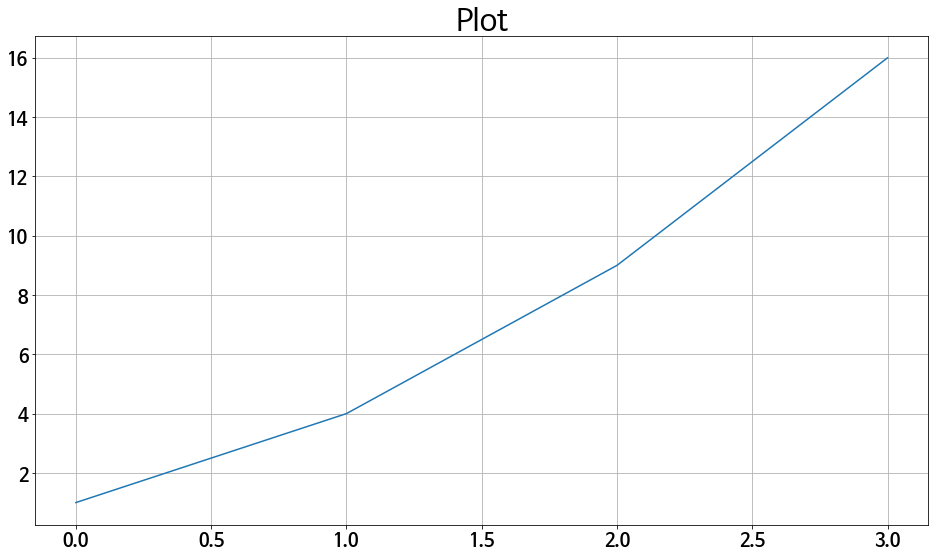

In [32]:
plt.title("Plot", size = 30)
plt.plot([1, 4, 9, 16])
plt.grid(True)
plt.show()

이 때 x 축의 자료 위치 즉, 틱(tick)은 자동으로 0, 1, 2, 3 이 된다. 만약 이 x tick 위치를 별도로 명시하고 싶다면 다음과 같이 두 개의 같은 길이의 리스트 혹은 배열 자료를 넣는다.

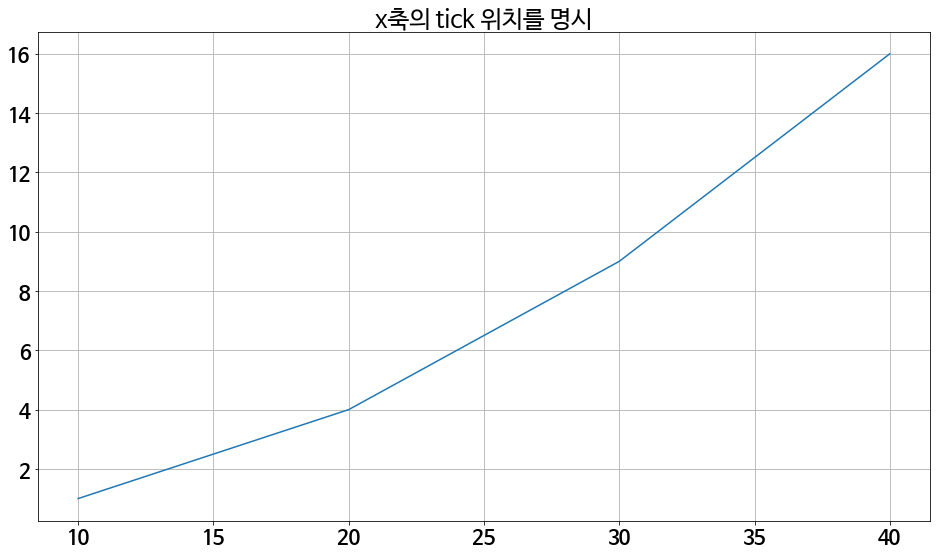

In [20]:
plt.title("x축의 tick 위치를 명시")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.grid(True)
plt.show()

`show` 명령은 시각화 명령을 실제로 차트로 렌더링(rendering)하고 마우스 움직임 등의 이벤트를 기다리라는 지시이다.
주피터 노트북에서는 셀 단위로 플롯 명령을 자동 렌더링 해주므로 `show` 명령이 필요없지만 일반 파이썬 인터프리터로 가동되는 경우를 대비하여 항상 마지막에 실행하도록 한다. `show` 명령을 주면 마지막 플롯 명령으로부터 반환된 플롯 객체의 표현도 가려주는 효과가 있다.

## **스타일 지정**

플롯 명령어는 보는 사람이 그림을 더 알아보기 쉽게 하기 위해 다양한 스타일(style)을 지원한다. `plot` 명령어에서는 다음과 같이 추가 문자열 인수를 사용하여 스타일을 지원한다.

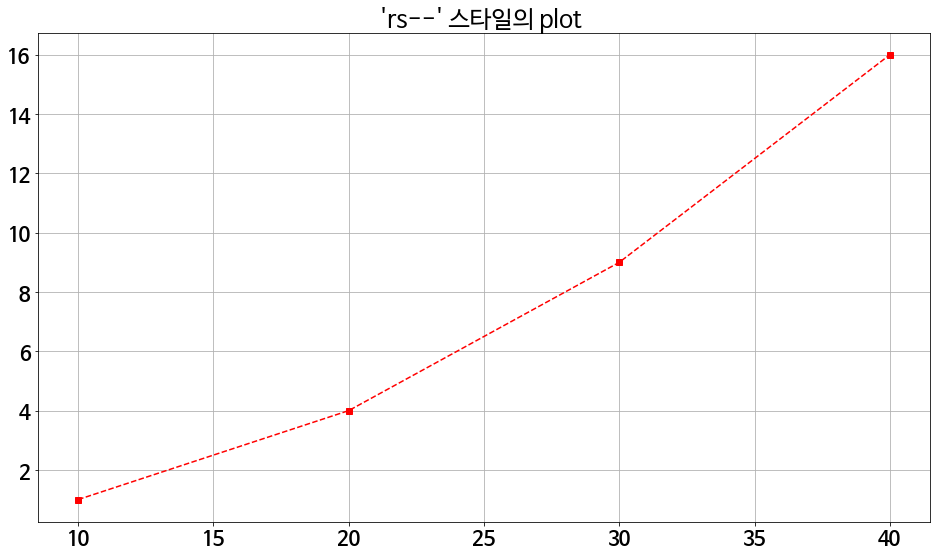

In [21]:
plt.title("'rs--' 스타일의 plot ")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'rs--')
plt.grid(True)
plt.show()

스타일 문자열은 색깔(color), 마커(marker), 선 종류(line style)의 순서로 지정한다. 만약 이 중 일부가 생략되면 디폴트값이 적용된다.

### **색깔**

색깔을 지정하는 방법은 색 이름 혹은 약자를 사용하거나 `#` 문자로 시작되는 RGB코드를 사용한다.

자주 사용되는 색깔은 한글자 약자를 사용할 수 있으며 약자는 아래 표에 정리하였다. 전체 색깔 목록은 다음 웹사이트를 참조한다.

* http://Matplotlib.org/examples/color/named_colors.html

| 문자열 | 약자 |
|-|-|
| `blue` | `b` |
| `green` | `g` |
| `red` | `r` |
| `cyan` | `c` |
| `magenta` | `m` |
| `yellow` | `y` |
| `black` | `k` |
| `white` | `w` |


표 4.3.1 : Matplotlib에서 자주 사용하는 Color 약자

### **마커**

 데이터 위치를 나타내는 기호를 마커(marker)라고 한다. 마커의 종류는 다음과 같다.

| 마커 문자열 | 의미 |
|-|-|
| `.` | point marker  |
| `,` | pixel marker |
| `o` | circle marker |
| `v` | triangle_down marker |
| `^` | triangle_up marker |
| `<` | triangle_left marker |
| `>` | triangle_right marker |
| `1` | tri_down marker |
| `2` | tri_up marker |
| `3` | tri_left marker |
| `4` | tri_right marker |
| `s` | square marker |
| `p` | pentagon marker |
| `*` | star marker |
| `h` | hexagon1 marker |
| `H` | hexagon2 marker |
| `+` | plus marker |
| `x` | x marker |
| `D` | diamond marker |
| `d` | thin_diamond marker |

표 4.3.2 : Matplotlib에서 자주 사용하는 Marker 종류

### **선 스타일**

선 스타일에는 실선(solid), 대시선(dashed), 점선(dotted), 대시-점선(dash-dit) 이 있다. 지정 문자열은 다음과 같다.

| 선 스타일 문자열 | 의미 |
|-|-|
| `-` |  solid line style
| `--` |  dashed line style
| `-.` |  dash-dot line style
| `:` |  dotted line style

표 4.3.3 : Matplotlib의 선 스타일(line style)

### **기타 스타일**

라인 플롯에서는 앞서 설명한 세 가지 스타일 이외에도 여러가지 스타일을 지정할 수 있지만 이 경우에는 인수 이름을 정확하게 지정해야 한다. 사용할 수 있는 스타일 인수의 목록은 `Matplotlib.lines.Line2D` 클래스에 대한 다음 웹사이트를 참조한다.

* http://Matplotlib.org/api/lines_api.html#Matplotlib.lines.Line2D

라인 플롯에서 자주 사용되는 기타 스타일은 다음과 같다.

| 스타일 문자열 | 약자 | 의미 |
|-|-|-|
| `color` | `c`  | 선 색깔 |
| `linewidth` | `lw` | 선 굵기 |
| `linestyle` | `ls` | 선 스타일 |
| `marker` |   | 마커 종류 |
| `markersize` | `ms`  | 마커 크기 |
| `markeredgecolor` | `mec`   |	마커 선 색깔 |
| `markeredgewidth` | `mew`   |	마커 선 굵기 |
| `markerfacecolor` | `mfc`   |	마커 내부 색깔 |


표 4.3.4 : Matplotlib의 스타일 인수 목록

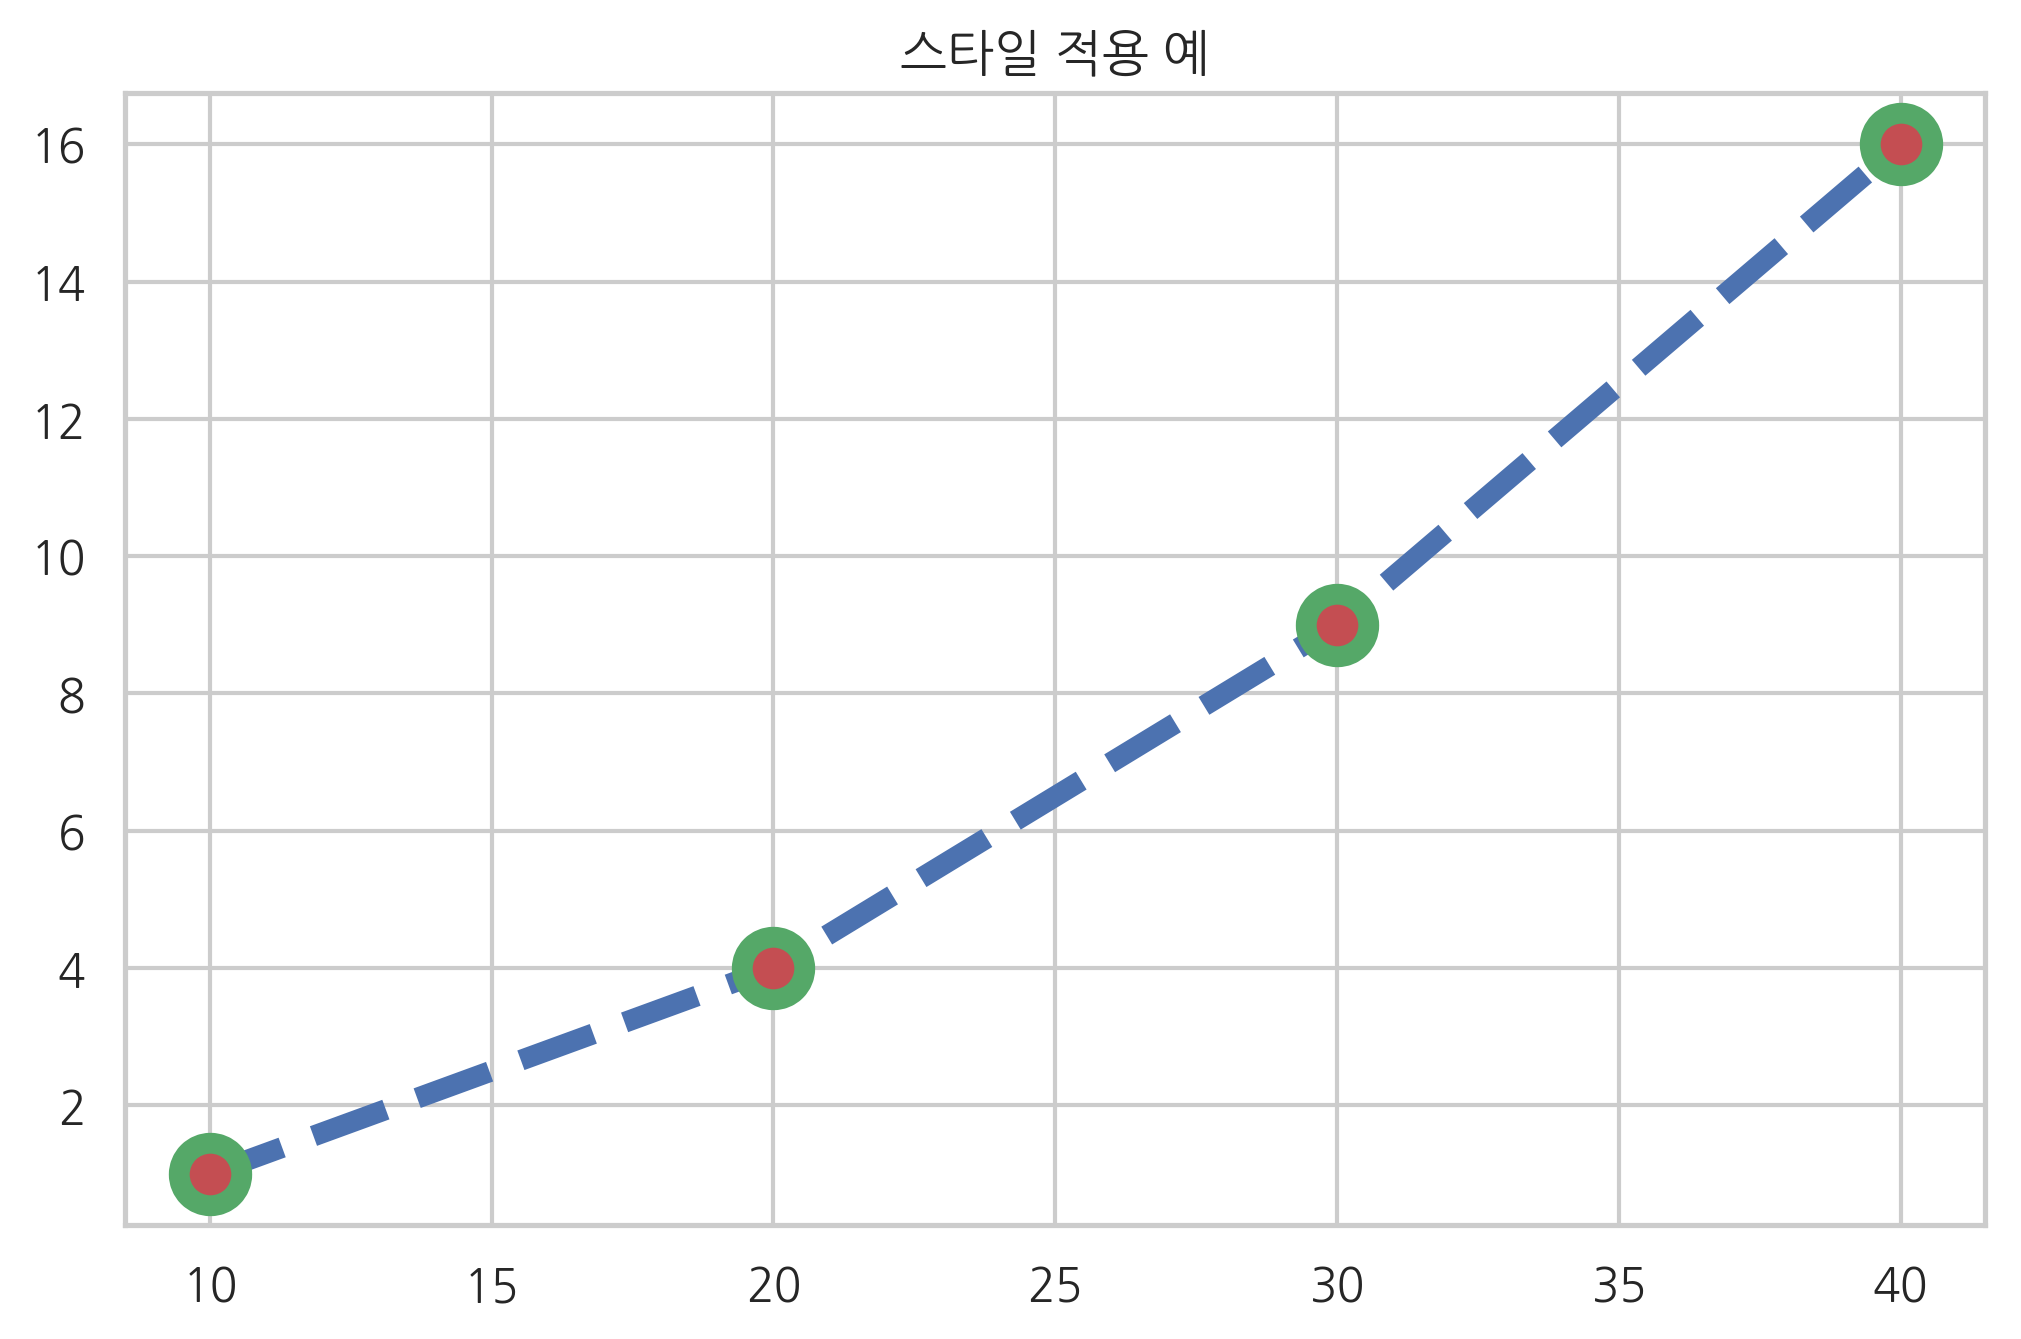

In [5]:
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.title("스타일 적용 예")
plt.show()

## **그림 범위 지정**

플롯 그림을 보면 몇몇 점들은 그림의 범위 경계선에 있어서 잘 보이지 않는 경우가 있을 수 있다. 그림의 범위를 수동으로 지정하려면 `xlim` 명령과 `ylim` 명령을 사용한다. 이 명령들은 그림의 범위가 되는 x축, y축의 최소값과 최대값을 지정한다.

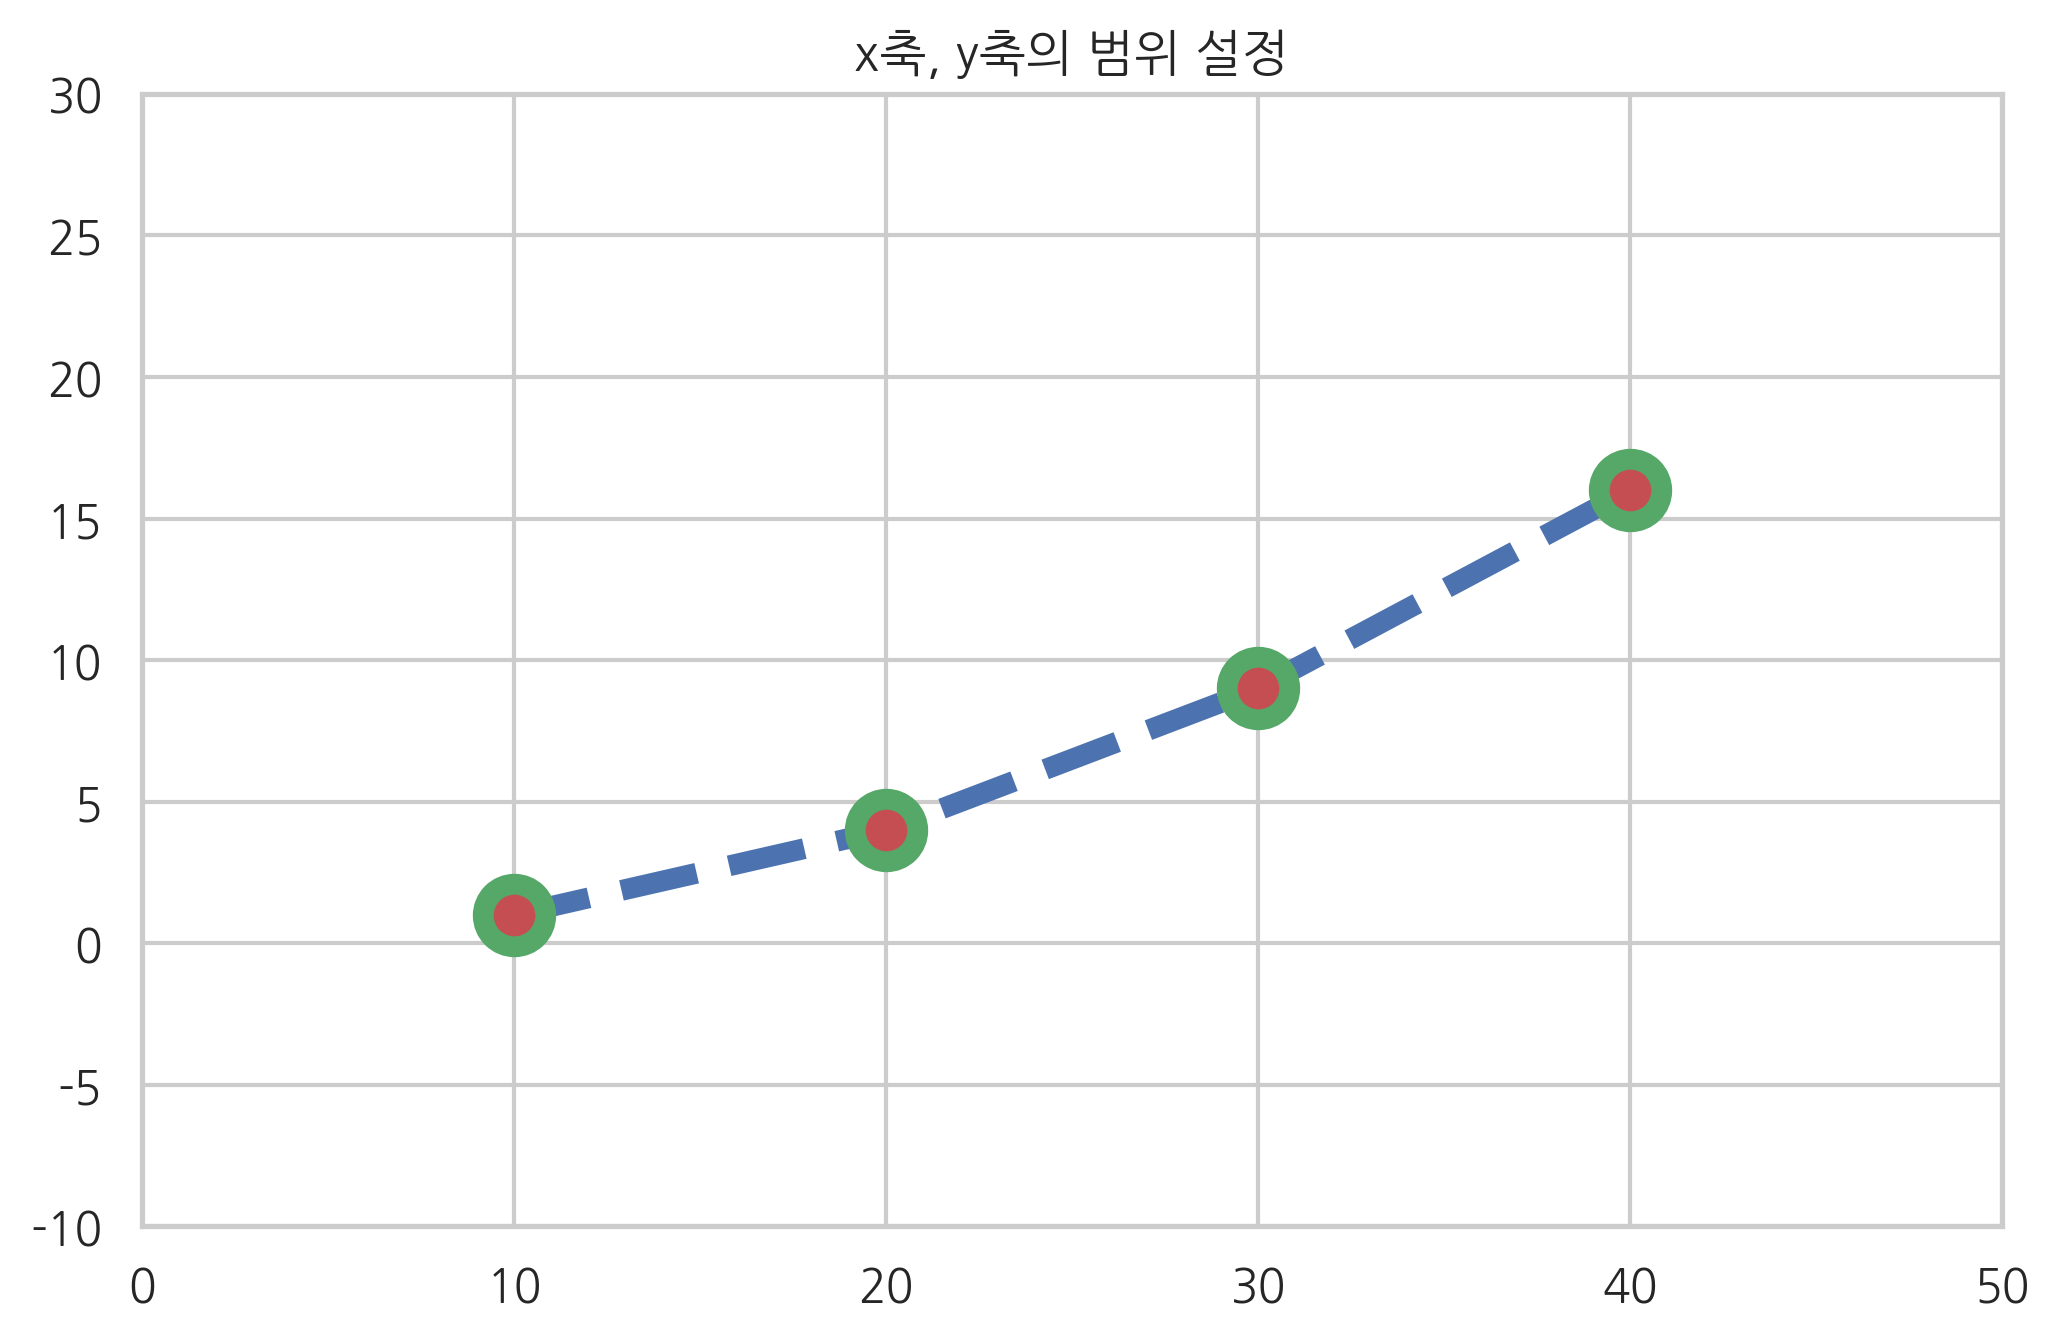

In [6]:
plt.title("x축, y축의 범위 설정")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.xlim(0, 50)
plt.ylim(-10, 30)
plt.show()

## **틱 설정**

플롯이나 차트에서 축상의 위치 표시 지점을 틱(tick)이라고 하고 이 틱에 써진 숫자 혹은 글자를 틱 라벨(tick label)이라고 한다. 틱의 위치나 틱 라벨은 Matplotlib가 자동으로 정해주지만 만약 수동으로 설정하고 싶다면 `xticks` 명령이나 `yticks` 명령을 사용한다.

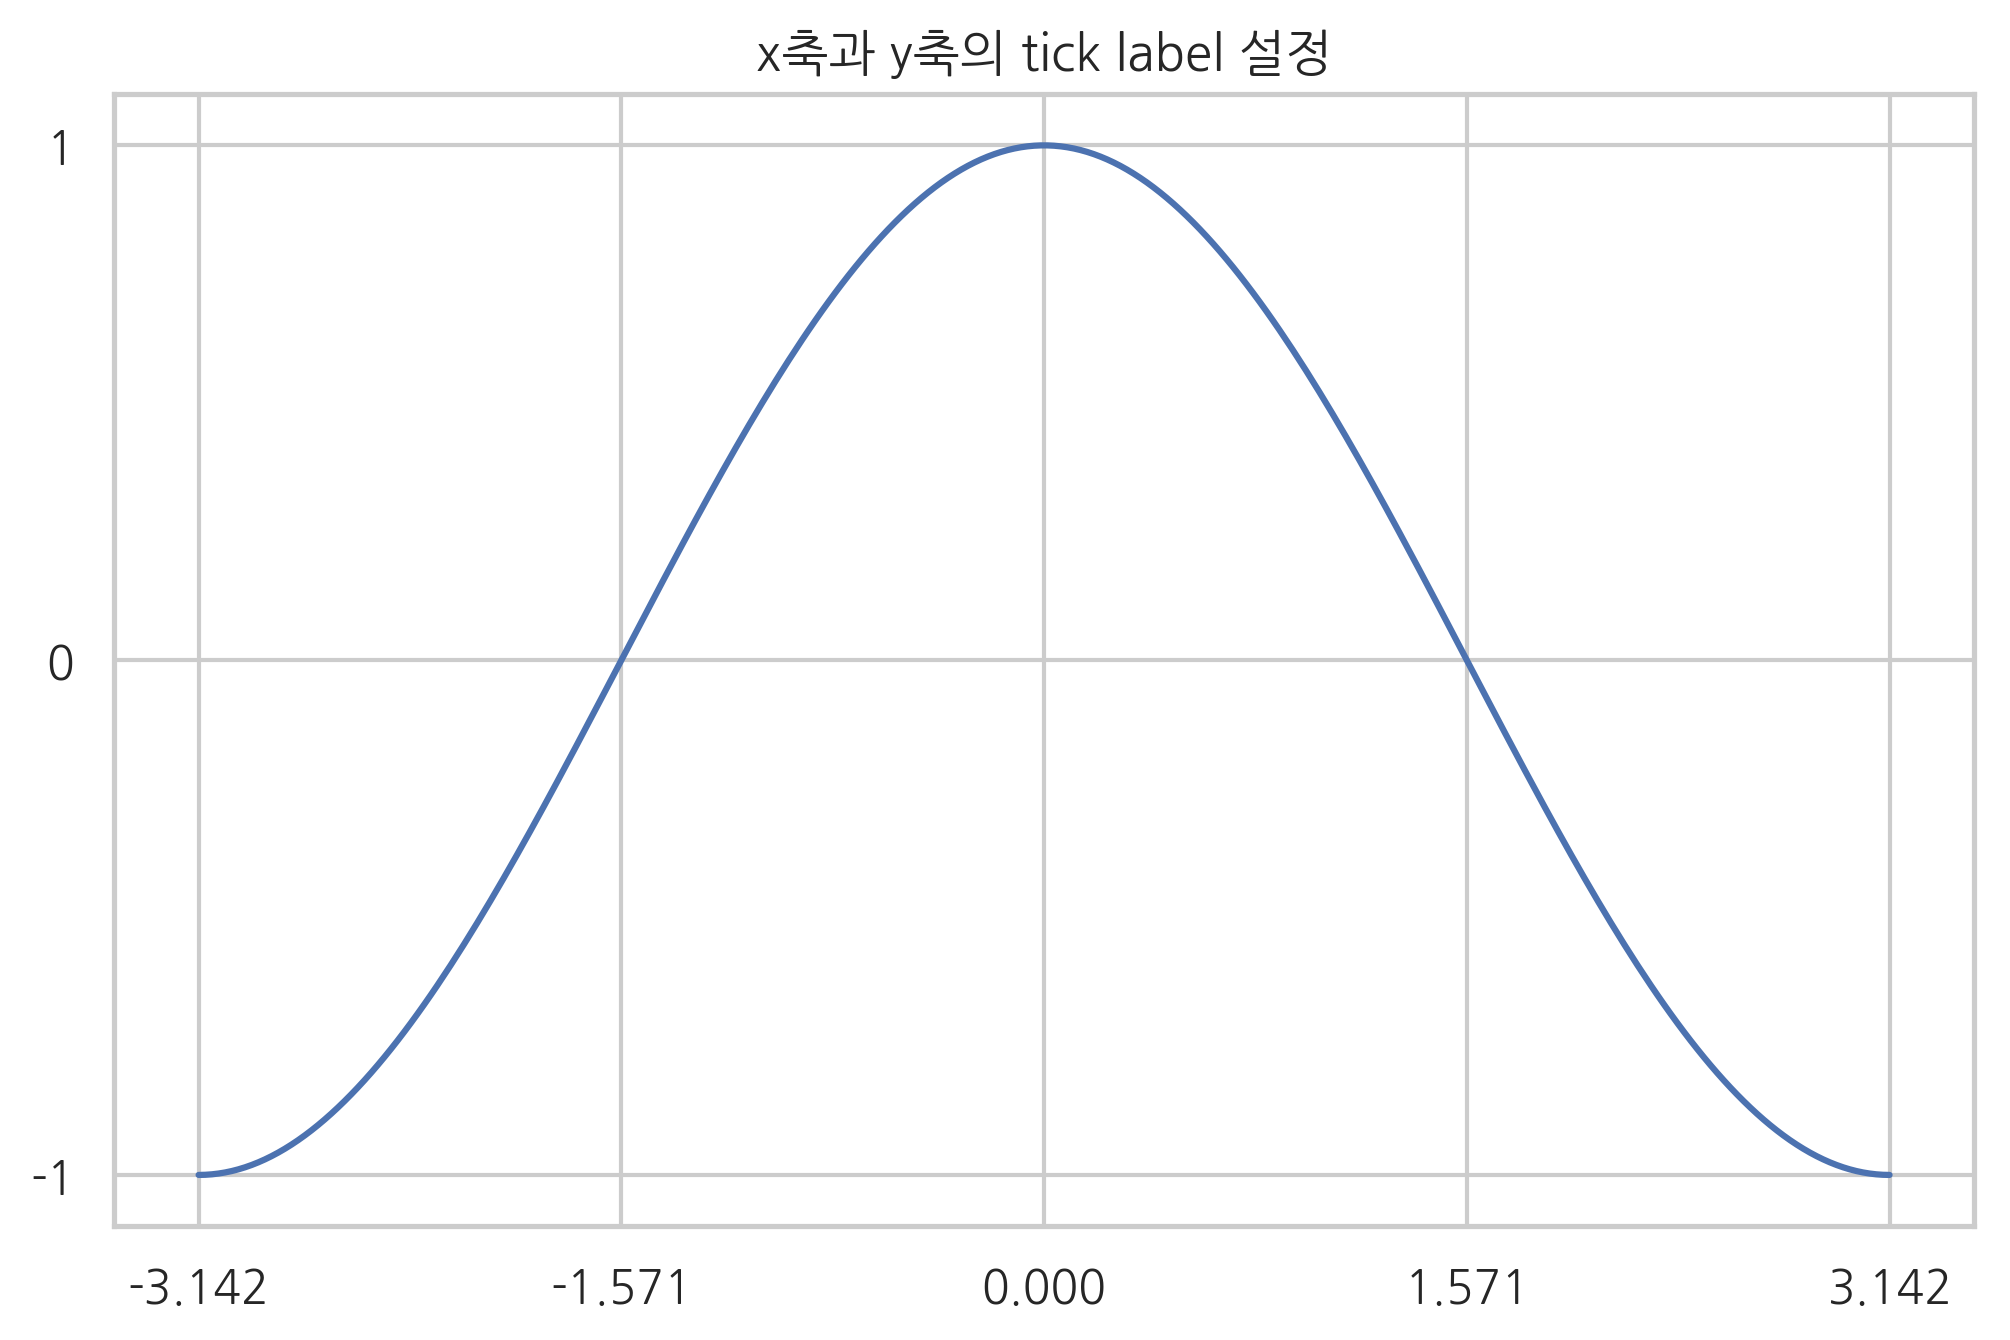

In [7]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("x축과 y축의 tick label 설정")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

틱 라벨 문자열에는 `$$` 사이에 LaTeX 수학 문자식을 넣을 수도 있다.

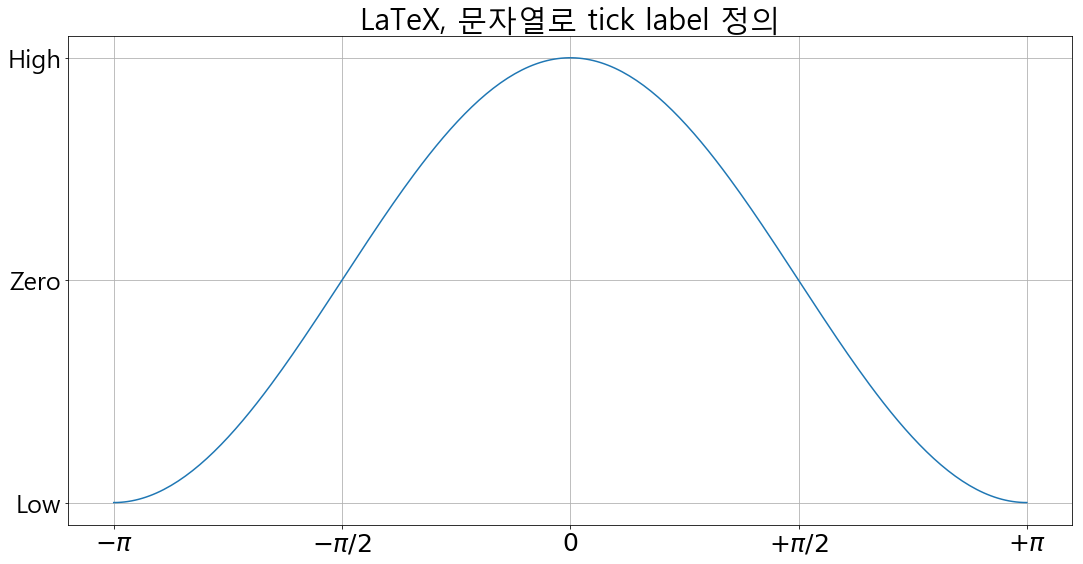

In [28]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("LaTeX, 문자열로 tick label 정의")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.grid(True)
plt.show()

## **그리드 설정**

위 그림을 보면 틱 위치를 잘 보여주기 위해 그림 중간에 그리드 선(grid line)이 자동으로 그려진 것을 알 수 있다. 그리드를 사용하지 않으려면 `grid(False)` 명령을 사용한다. 다시 그리드를 사용하려면 `grid(True)`를 사용한다.

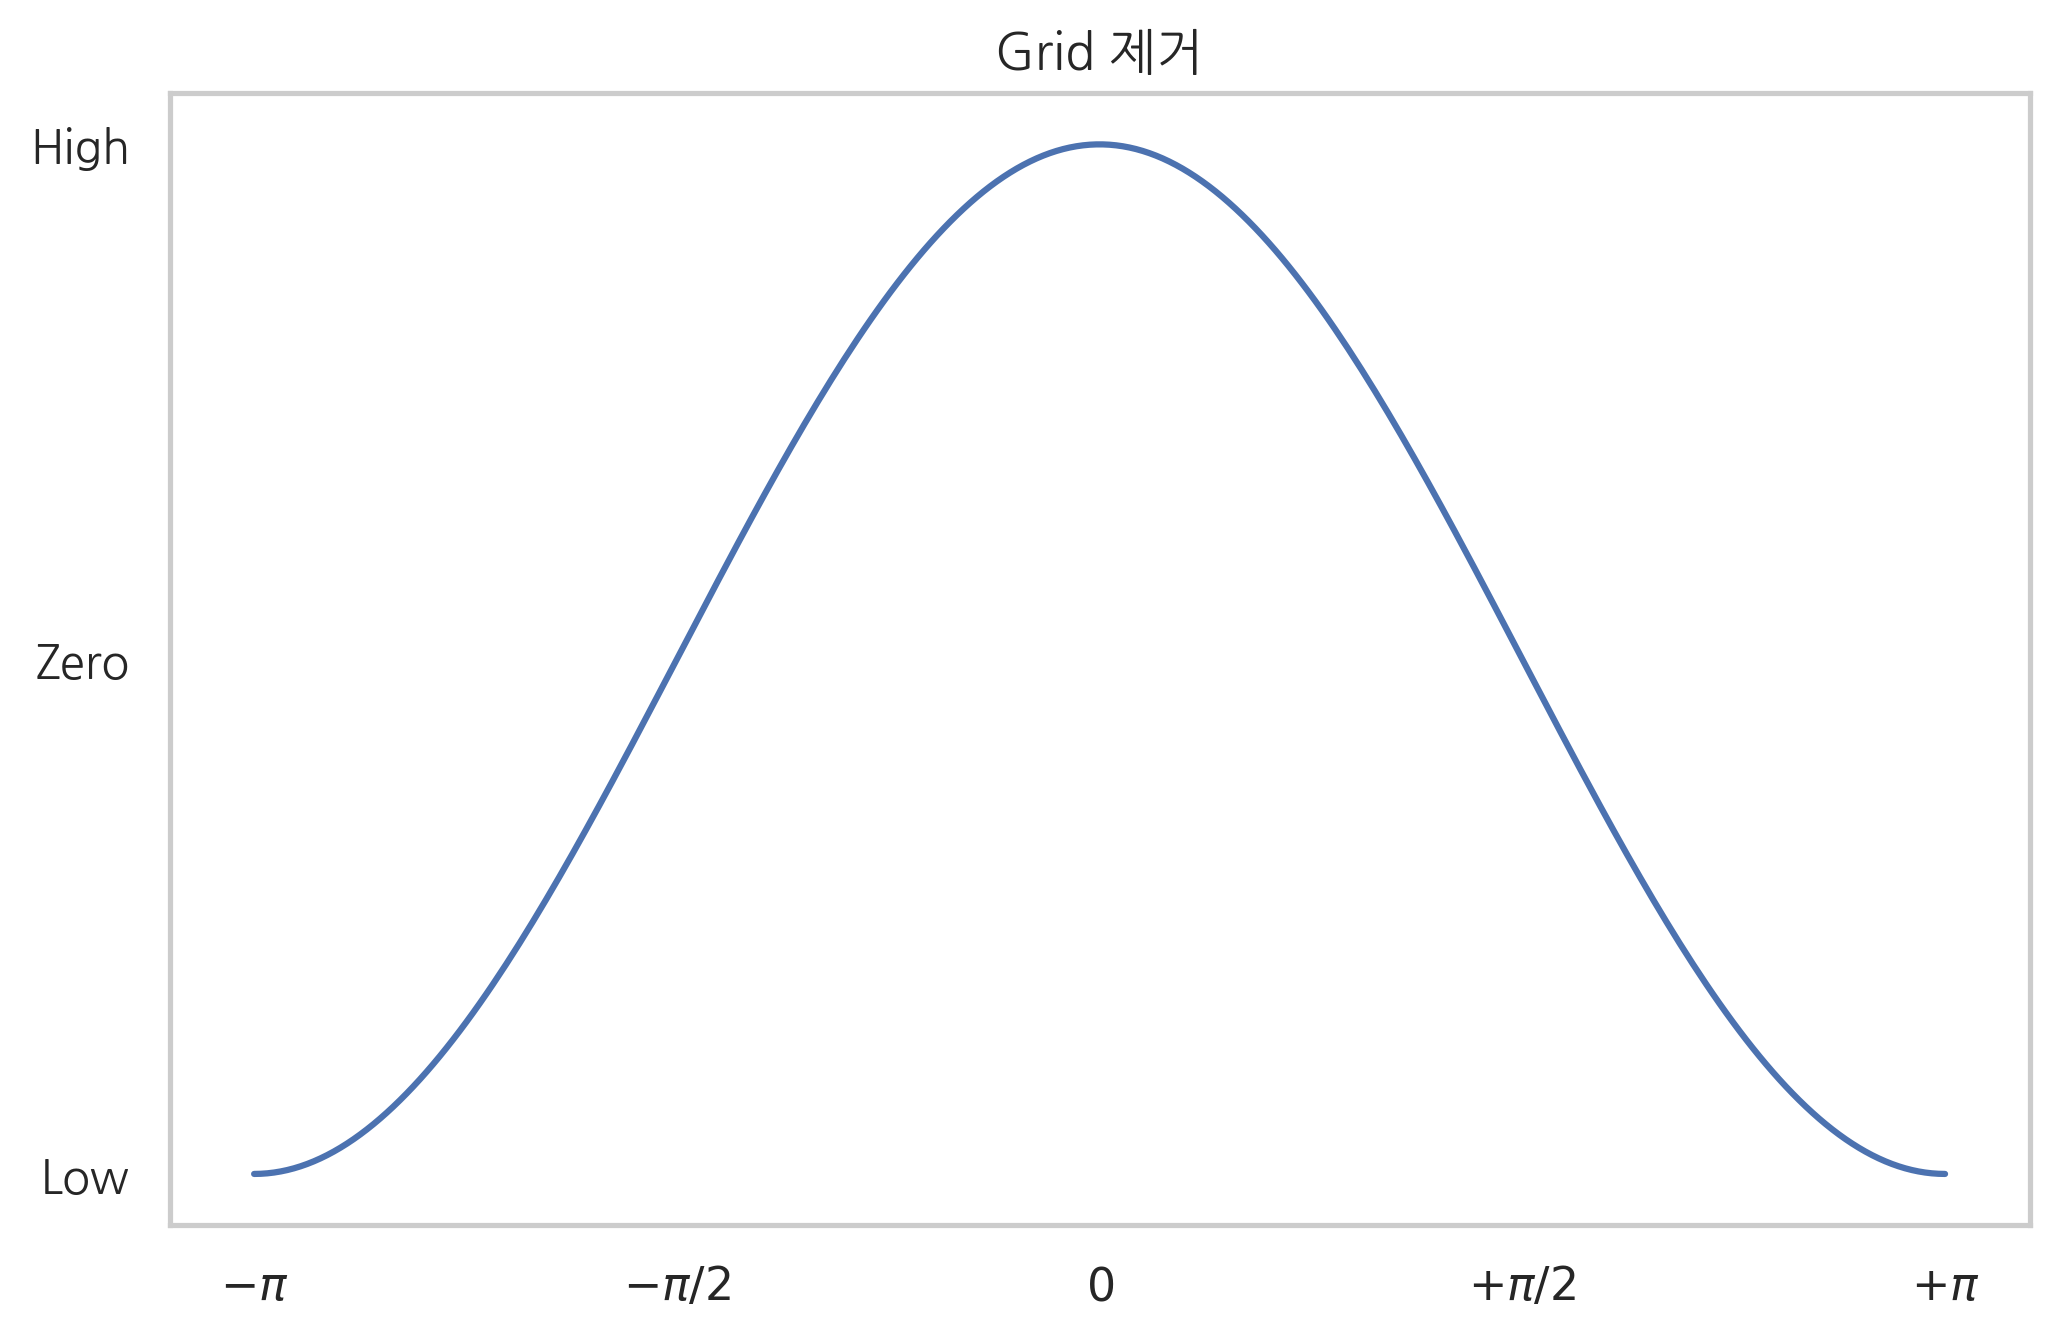

In [9]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("Grid 제거")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.grid(False)
plt.show()

## **여러개의 선을 그리기**

라인 플롯에서 선을 하나가 아니라 여러개를 그리고 싶은 경우에는 x 데이터, y 데이터, 스타일 문자열을 반복하여 인수로 넘긴다. 이 경우에는 하나의 선을 그릴 때 처럼 x 데이터나 스타일 문자열을 생략할 수 없다.

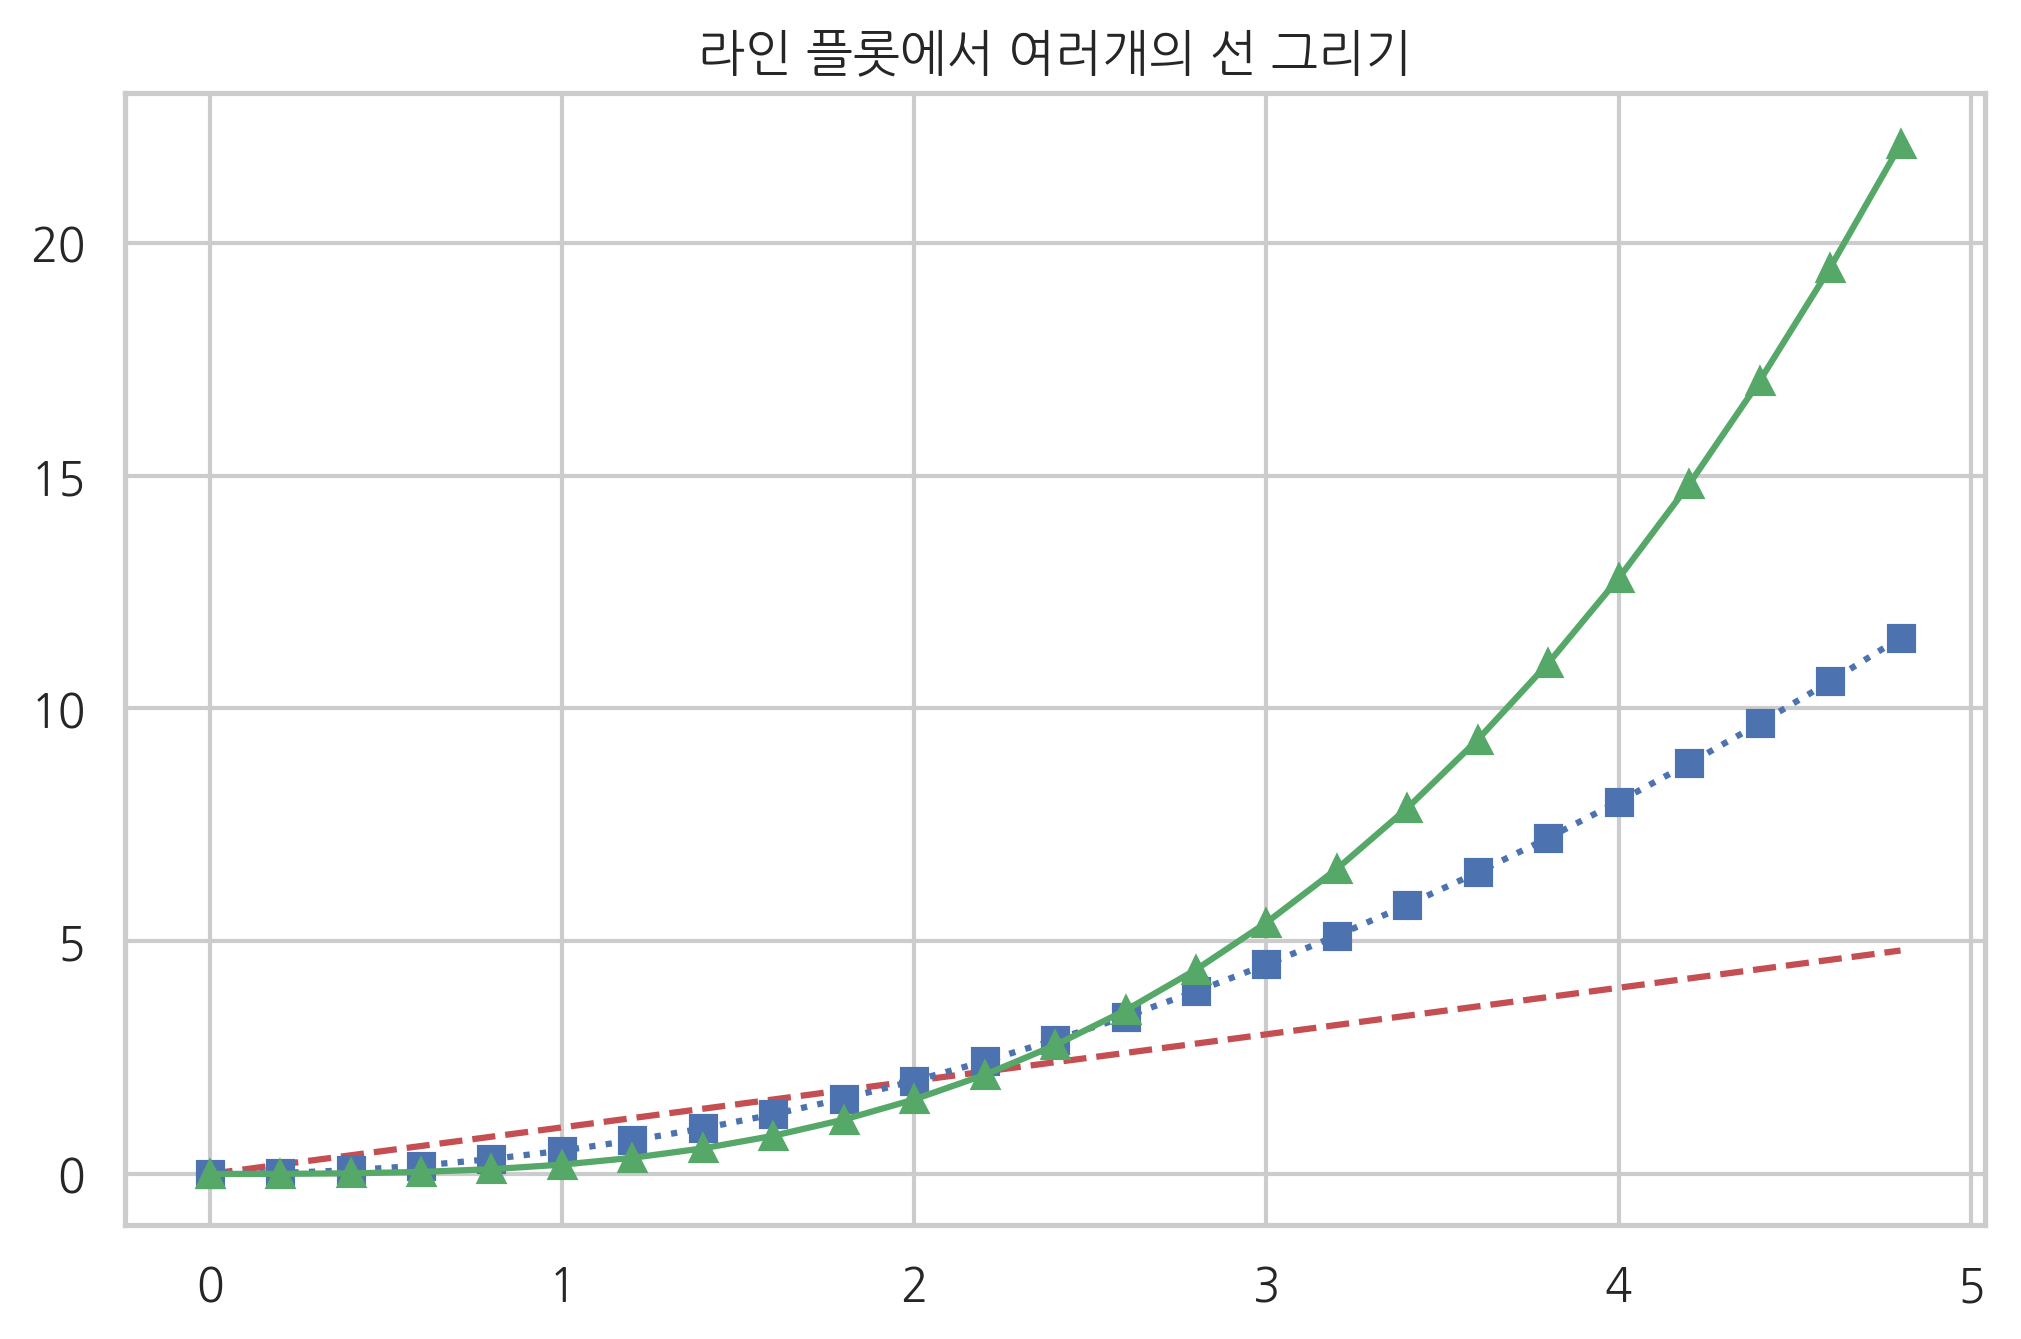

In [10]:
t = np.arange(0., 5., 0.2)
plt.title("라인 플롯에서 여러개의 선 그리기")
plt.plot(t, t, 'r--', t, 0.5 * t**2, 'bs:', t, 0.2 * t**3, 'g^-')
plt.show()

## **홀드 명령**

하나의 `plot` 명령이 아니라 복수의 `plot` 명령을 하나의 그림에 겹쳐서 그릴 수도 있다. 

Matplotlib 1.5까지는 `hold(True)` 명령을 이용하여 기존의 그림 위에 겹쳐 그리도록 하였다. 겹치기를 종료하는 것은 `hold(False)` 명령이다.

Matplotlib 2.0부터는 모든 플롯 명령에 `hold(True)`가 자동 적용된다.

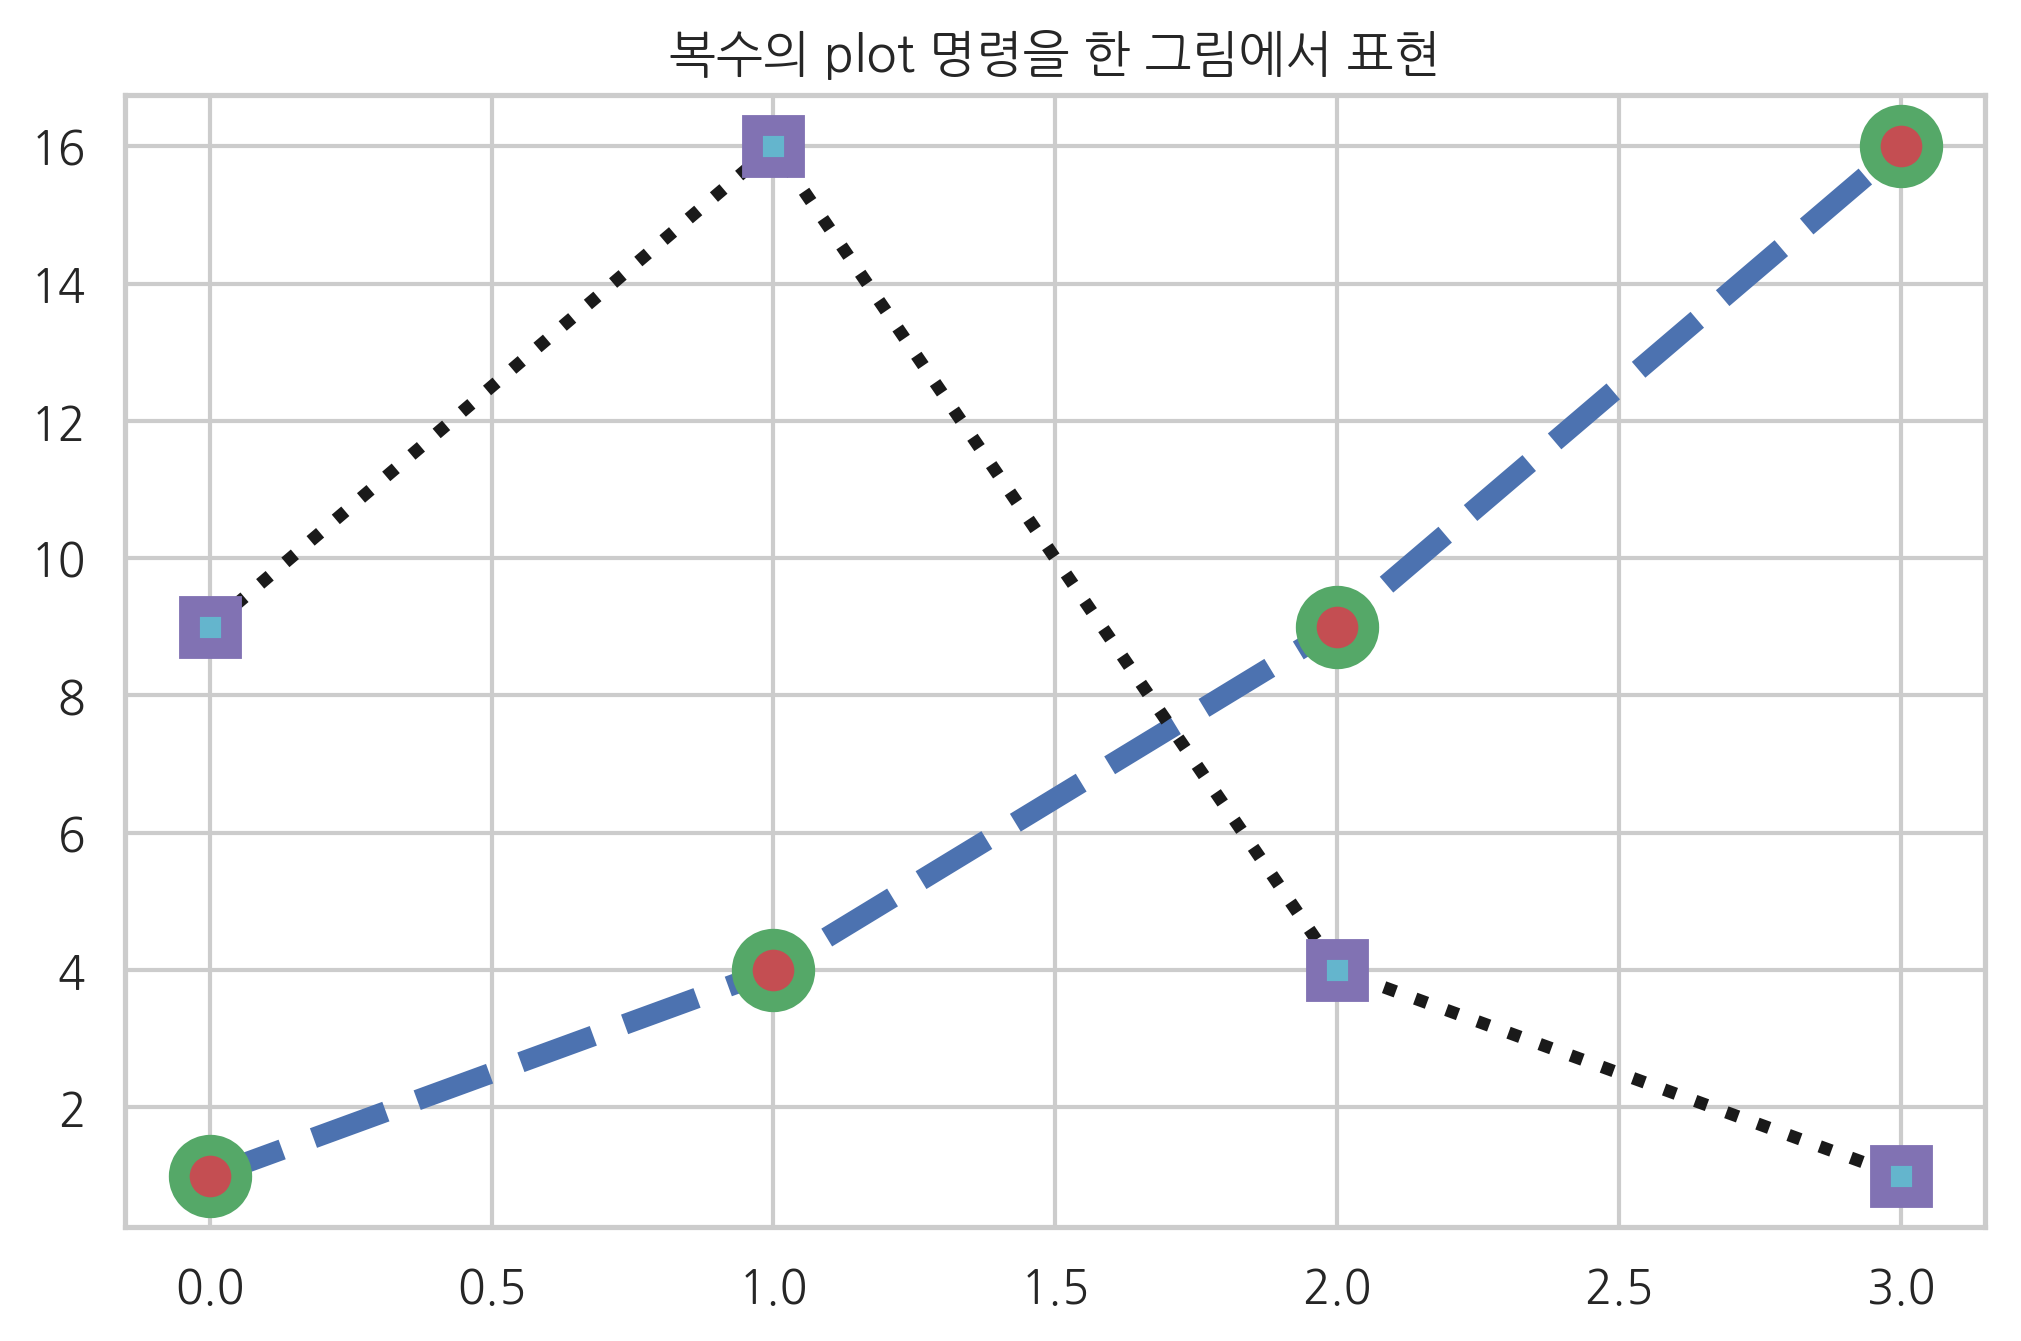

In [11]:
plt.title("복수의 plot 명령을 한 그림에서 표현")
plt.plot([1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
# plt.hold(True)   # <- 1,5 버전에서는 이 코드가 필요하다.
plt.plot([9, 16, 4, 1],
         c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c")
# plt.hold(False)  # <- 1,5 버전에서는 이 코드가 필요하다.
plt.show()

## **범례**

여러개의 라인 플롯을 동시에 그리는 경우에는 각 선이 무슨 자료를 표시하는지를 보여주기 위해 `legend` 명령으로  범례(legend)를 추가할 수 있다. 범례의 위치는 자동으로 정해지지만 수동으로 설정하고 싶으면 `loc` 인수를 사용한다. 인수에는 문자열 혹은 숫자가 들어가며 가능한 코드는 다음과 같다.

| loc 문자열 | 숫자 |
|-|-|
| `best` |  0 | 
| `upper right` |  1 | 
| `upper left` |  2 | 
| `lower left` |  3 | 
| `lower right` |  4 | 
| `right` |  5 | 
| `center left` |  6 | 
| `center right` |  7 | 
| `lower center` |  8 | 
| `upper center` |  9 | 
| `center` |  10 | 



표 4.3.5 : plt.legend의 `loc` 인수 목록

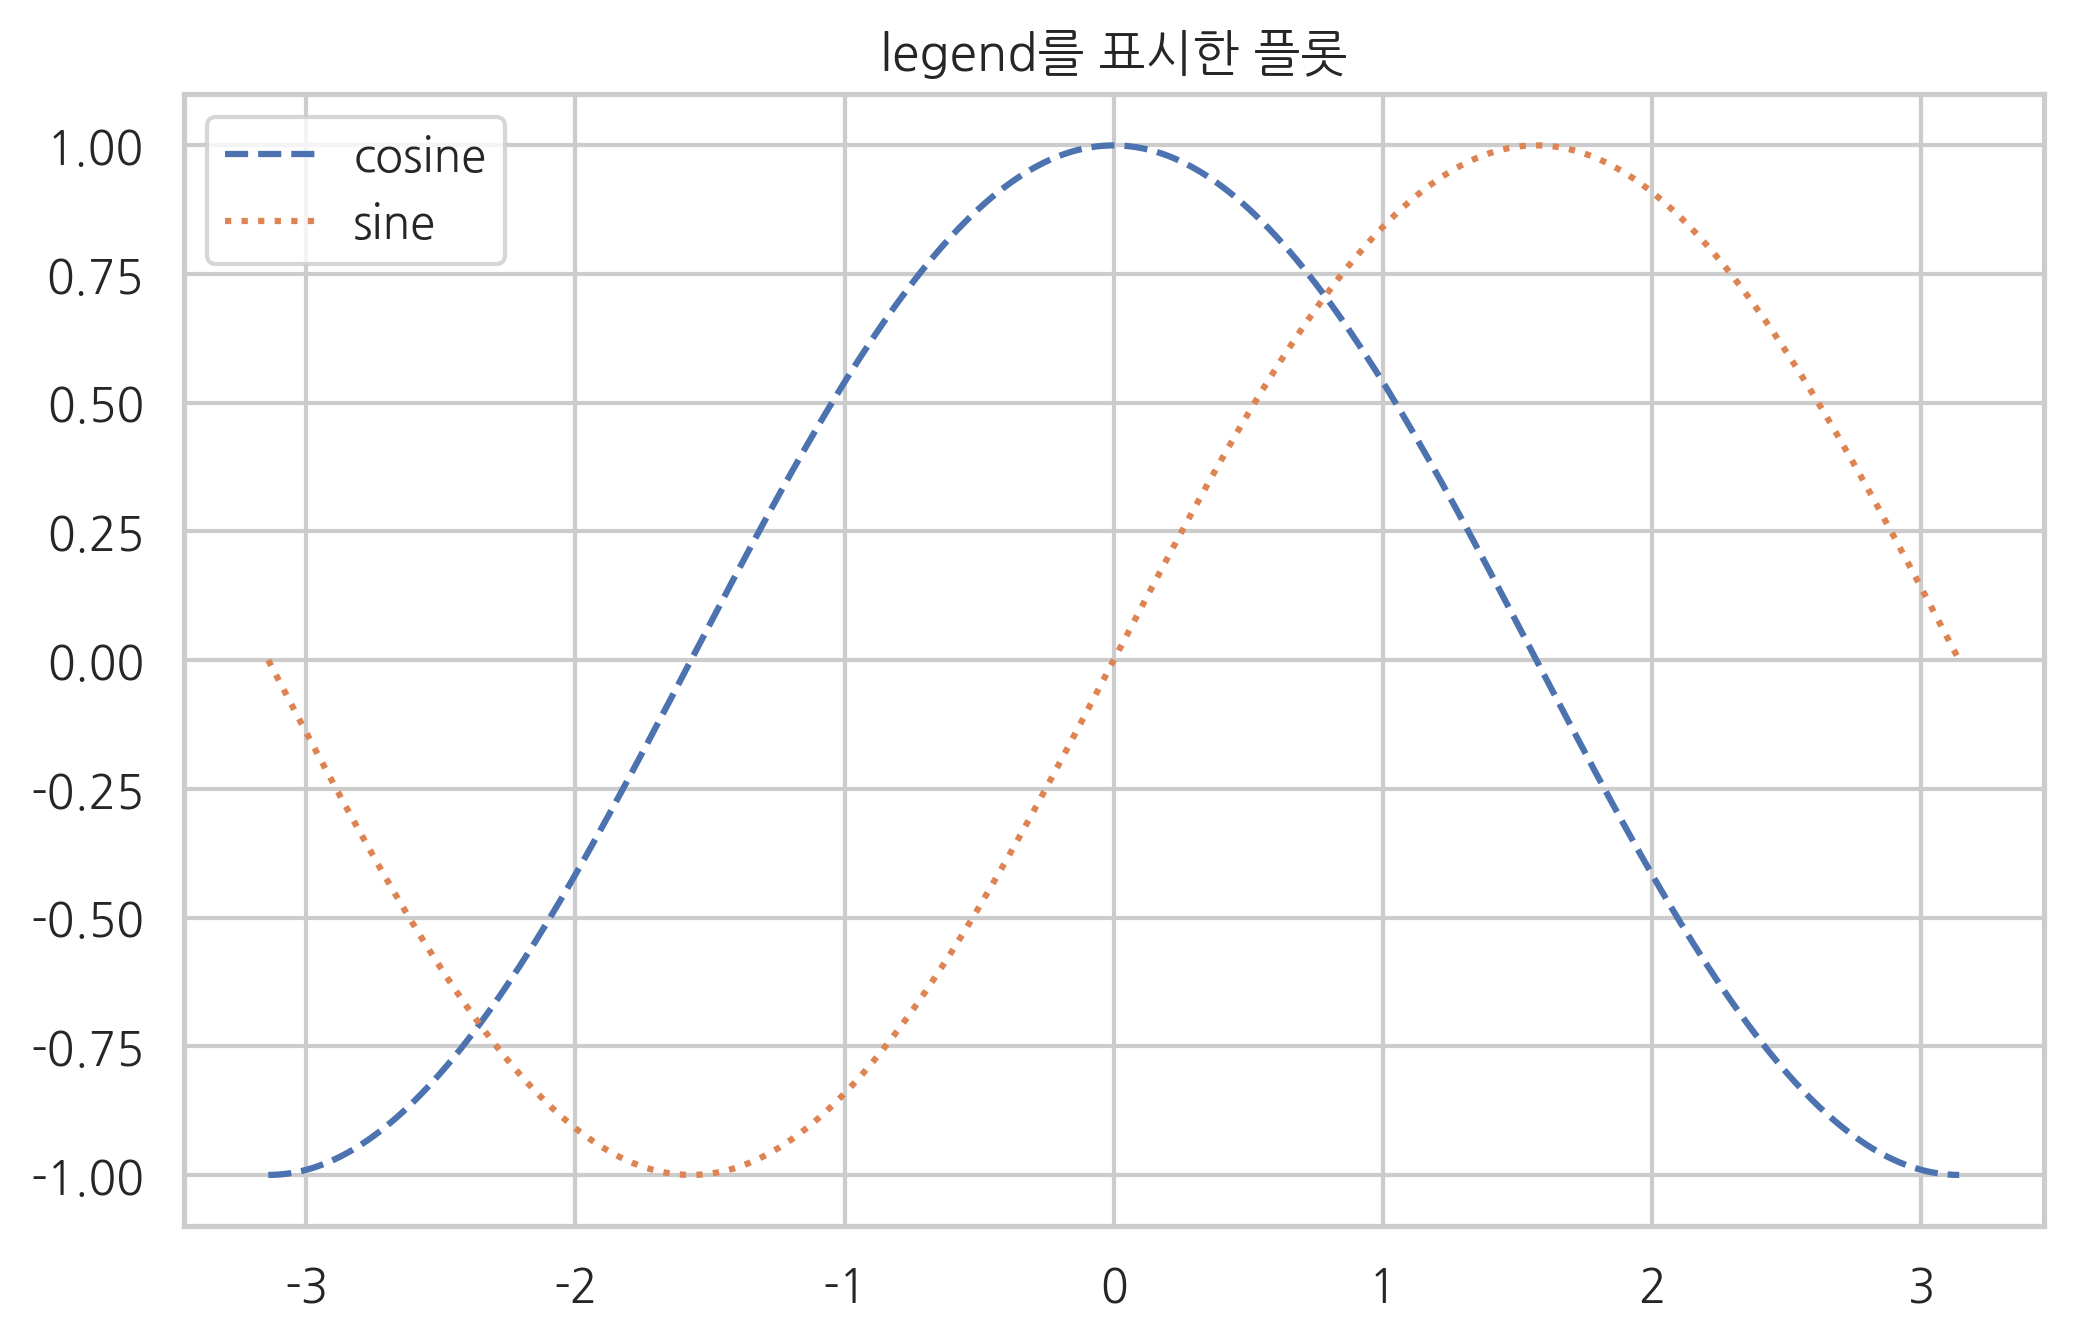

In [12]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.title("legend를 표시한 플롯")
plt.plot(X, C, ls="--", label="cosine")
plt.plot(X, S, ls=":", label="sine")
plt.legend(loc=2)
plt.show()

## **x축, y축 라벨, 타이틀**

플롯의 x축 위치와 y축 위치에는 각각 그 데이터가 의미하는 바를 표시하기 위해 라벨(label)를 추가할 수 있다. 라벨을 붙이려면 `xlabel`. `ylabel` 명령을 사용한다. 또 플롯의 위에는 `title` 명령으로 제목(title)을 붙일 수 있다.

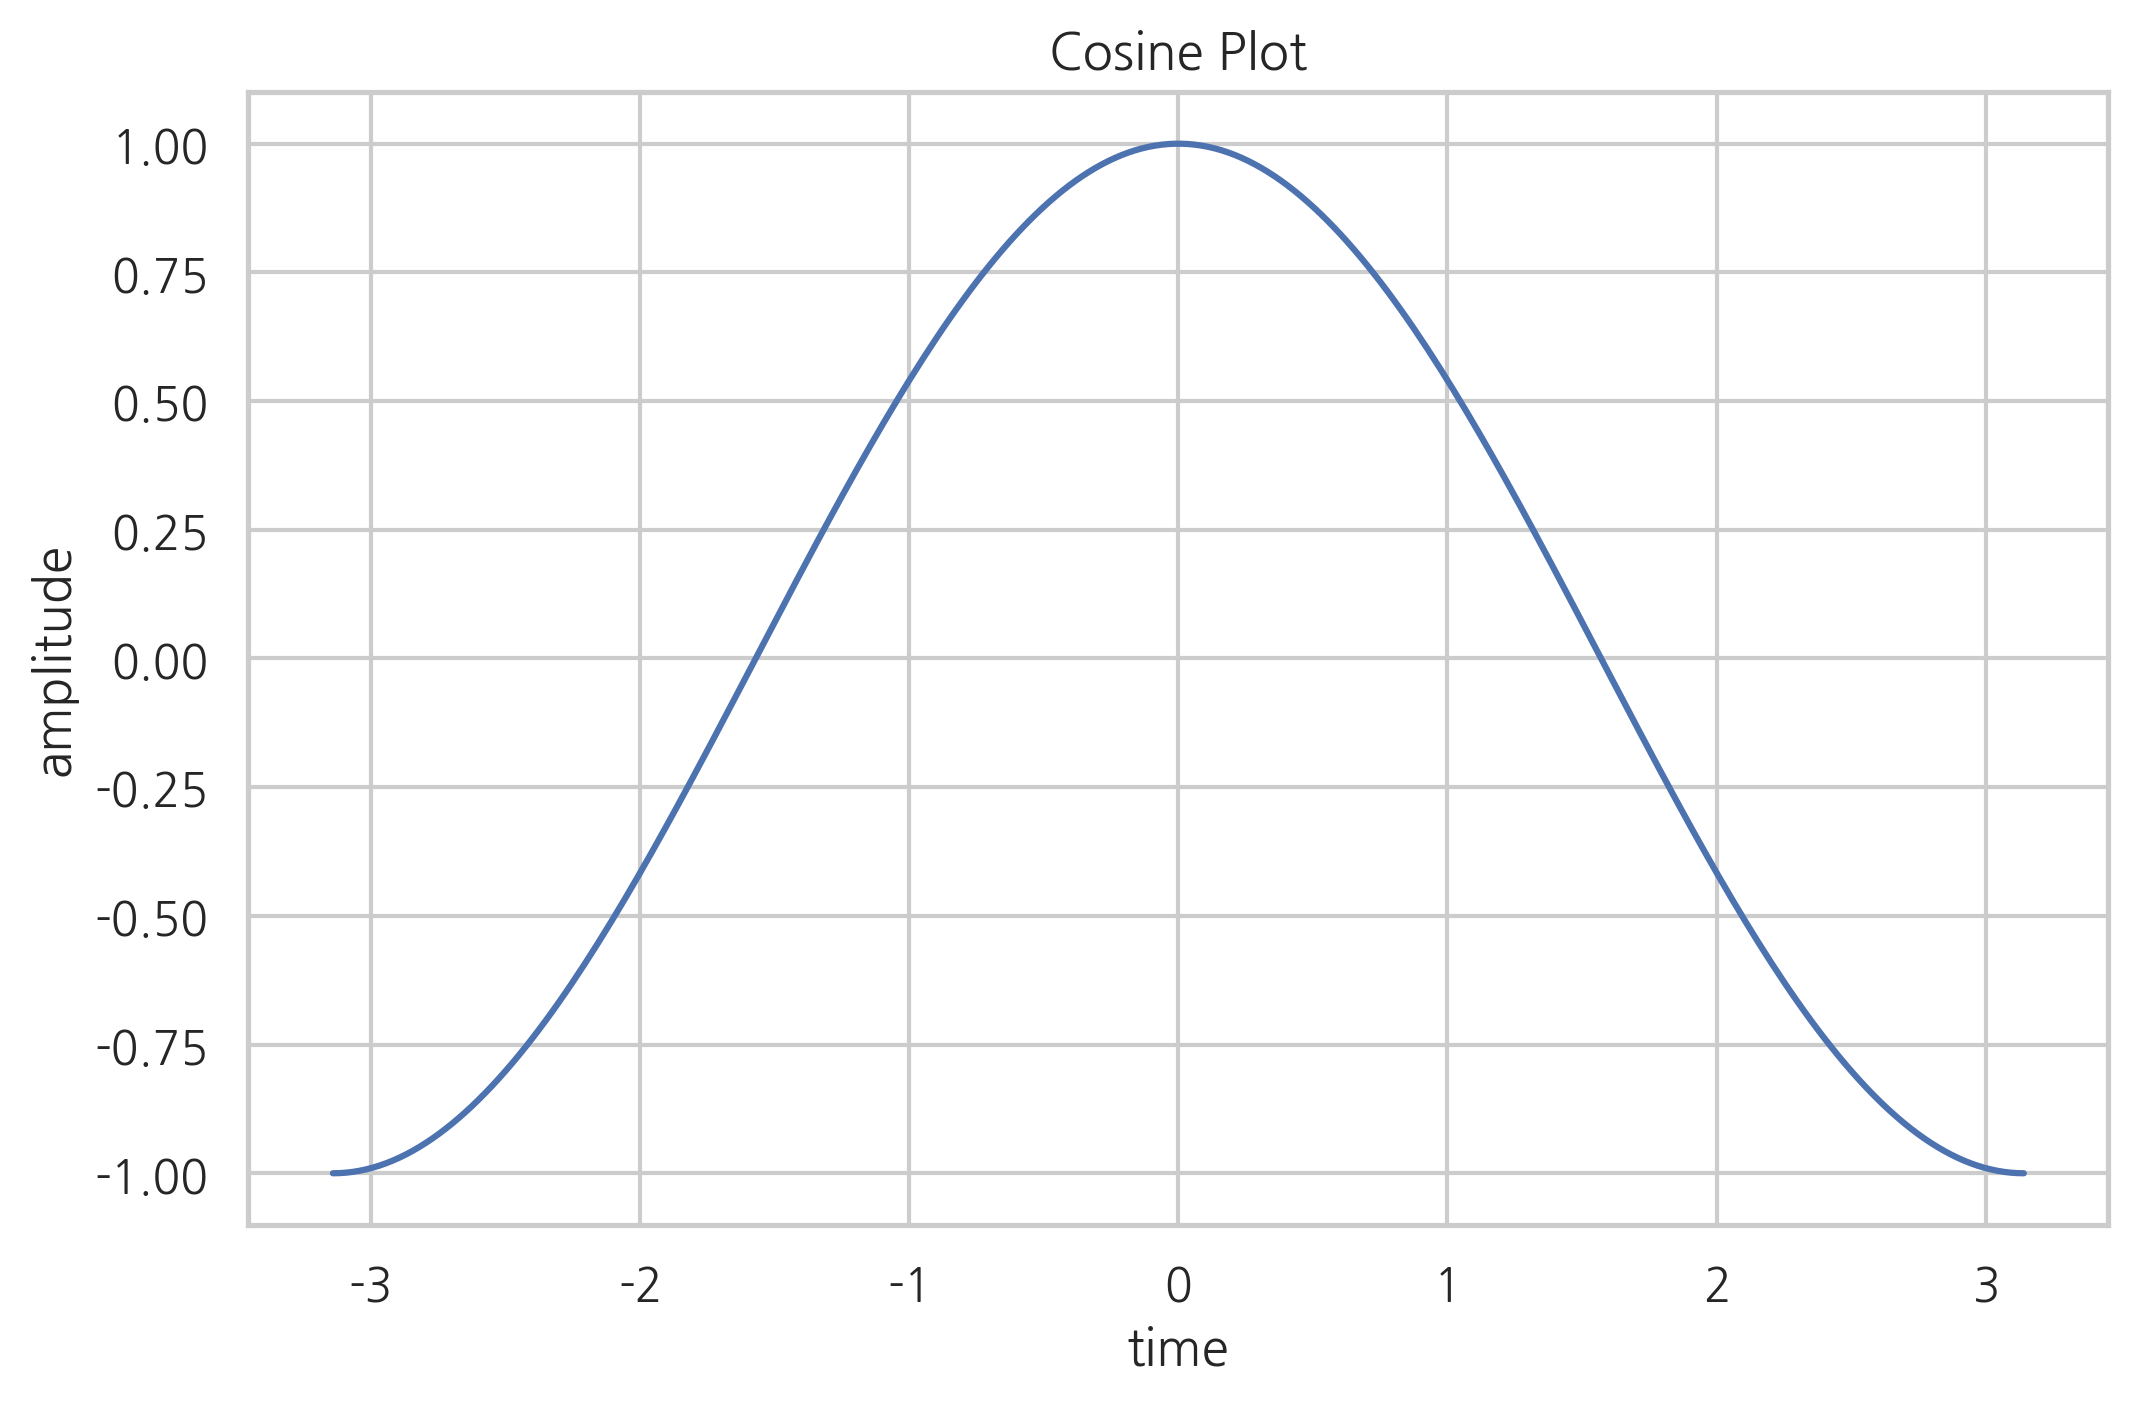

In [13]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label="cosine")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Cosine Plot")
plt.show()

#### 연습 문제 4.4.1

여러가지 함수를 사용하여 아래 조건에 맞는 그래프를 그린다. 

 - xlabel, ylabel, title을 모두 갖추고 있어야 한다.
 - 하나의 Figure(일단, 그림이라고 이해한다. 아래에 자세한 설명이 있다.)에 3개 이상의 Plot을 그린다. 
 - 각 Plot은 다른 선, 마크, 색 스타일을 가진다. 
 - legend는 그래프와 겹치지 않는 곳에 위치 시키도록 한다. 

## **그림의 구조**

Matplotlib가 그리는 그림은 Figure 객체, Axes 객체, Axis 객체 등으로 구성된다. Figure 객체는 한 개 이상의  Axes 객체를 포함하고 Axes 객체는 다시 두 개 이상의 Axis 객체를 포함한다.  다음 그림은 이 구조를 설명하고 있다.

<img src="https://datascienceschool.net/upfiles/4e20efe6352e4f4fac65c26cb660f522.png" style="width: 50%">

Figure는 그림이 그려지는 캔버스나 종이를 뜻하고 Axes는 하나의 플롯, 그리고 Axis는 가로축이나 세로축 등의 축을 뜻한다. Axes와 Axis의 철자에 주의한다.

### **Figure 객체**

모든 그림은 Figure 객체. 정식으로는  `Matplotlib.figure.Figure` 클래스 객체에 포함되어 있다. 내부 플롯(inline plot)이 아닌 경우에는 하나의 Figure는 하나의 아이디 숫자와 윈도우(Window)를 가진다. 주피터 노트북에서는 윈도우 객체가 생성되지 않지만 파이썬을 독립 실행하는 경우에는 하나의 Figure당 하나의 윈도우를 별도로 가진다. Figure 객체에 대한 자세한 설명은 다음 웹사이트를 참조한다.

* http://Matplotlib.org/api/figure_api.html#Matplotlib.figure.Figure

원래 Figure를 생성하려면 `figure` 명령을 사용하여 그 반환값으로 Figure 객체를 얻어야 한다. 그러나 일반적인 `plot` 명령 등을 실행하면 자동으로 Figure를 생성해주기 때문에 일반적으로는 `figure` 명령을 잘 사용하지 않는다. `figure` 명령을 명시적으로 사용하는 경우는 여러개의 윈도우를 동시에 띄워야 하거나(line plot이 아닌 경우), Jupyter 노트북 등에서(line plot의 경우) 그림의 크기를 설정하고 싶을 때이다. 그림의 크기는 figsize 인수로 설정한다.

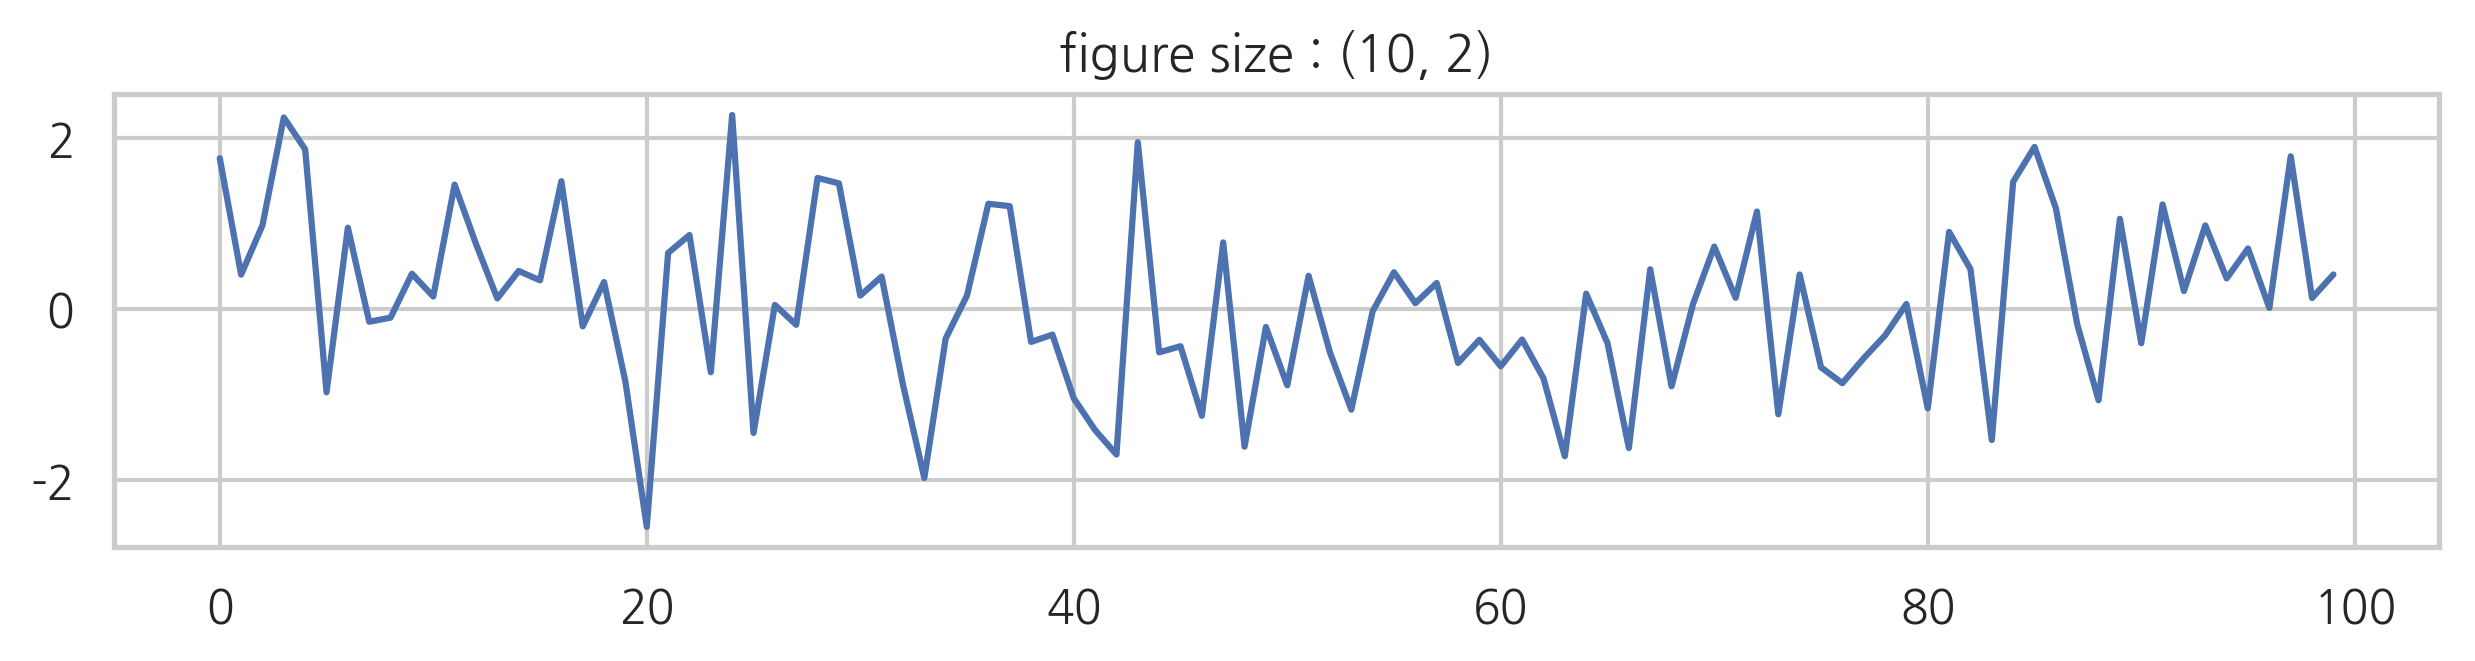

In [14]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.show()

현재 사용하고 있는 Figure 객체를 얻으려면(다른 변수에 할당할 수도 있다.) `gcf` 명령을 사용한다.

Figure(2400x1500) 139999908738888
Figure(2400x1500) 139999908738888


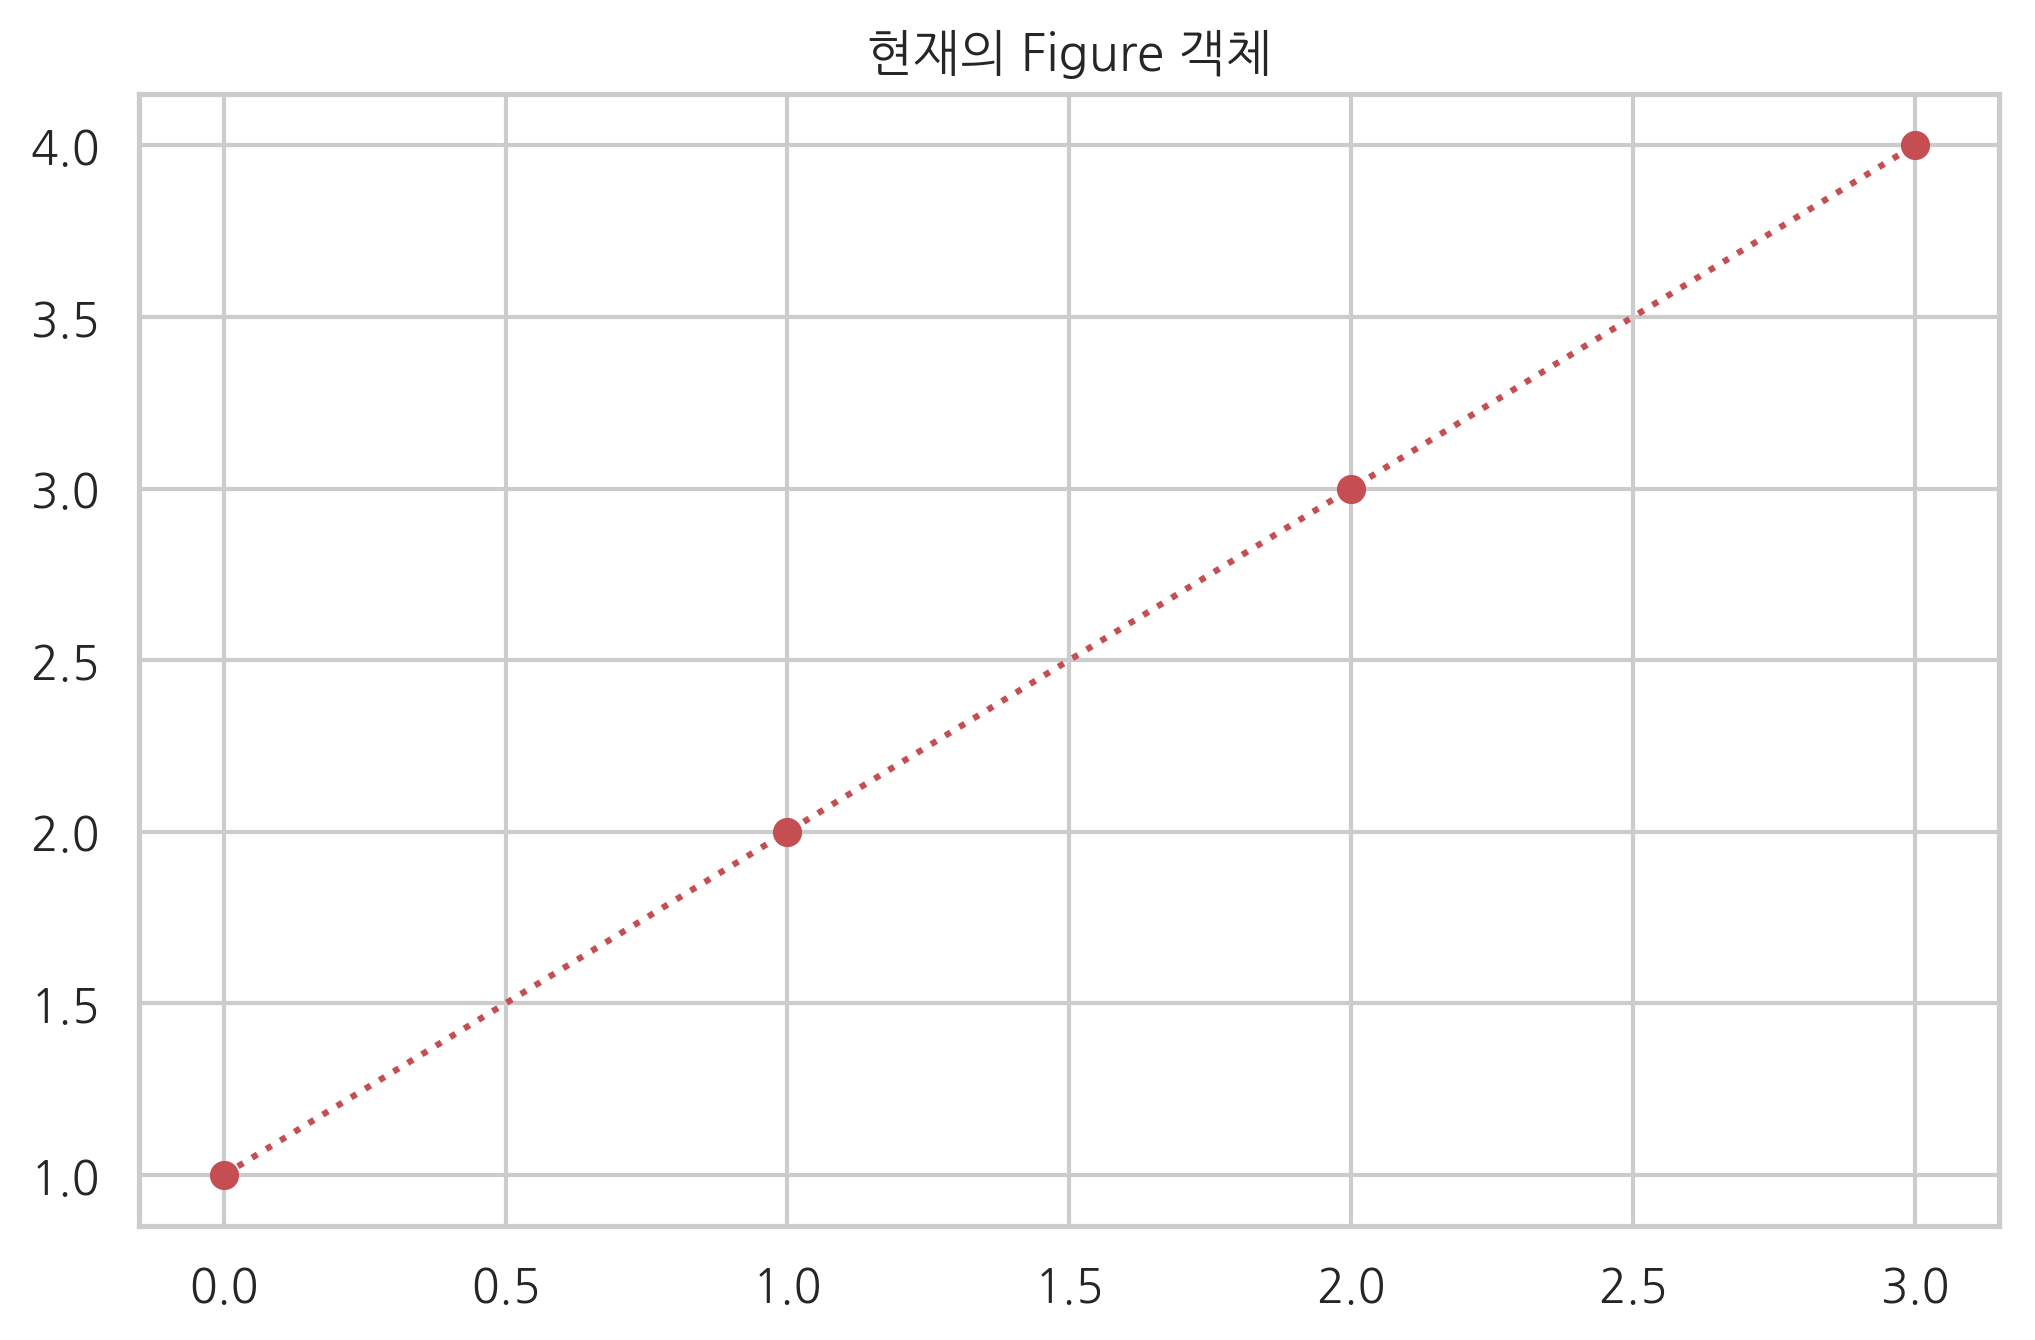

In [15]:
f1 = plt.figure(1)
plt.title("현재의 Figure 객체")
plt.plot([1, 2, 3, 4], 'ro:')

f2 = plt.gcf()
print(f1, id(f1))
print(f2, id(f2))
plt.show()

### **Axes 객체와 `subplot` 명령**

때로는 다음과 같이 하나의 윈도우(Figure)안에 여러개의 플롯을 배열 형태로 보여야하는 경우도 있다. Figure 안에 있는 각각의 플롯은 Axes 라고 불리는 객체에 속한다. Axes 객체에 대한 자세한 설명은 다음 웹사이트를 참조한다.

* http://Matplotlib.org/api/axes_api.html#Matplotlib.axes.Axes

Figure 안에 Axes를 생성하려면 원래 `subplot` 명령을 사용하여 명시적으로 Axes 객체를 얻어야 한다. 그러나 plot 명령을 바로 사용해도 자동으로 Axes를 생성해 준다.

`subplot` 명령은 그리드(grid) 형태의 Axes 객체들을 생성하는데 Figure가 행렬(matrix)이고 Axes가 행렬의 원소라고 생각하면 된다. 예를 들어 
위와 아래 두 개의 플롯이 있는 경우 행이 2 이고 열이 1인 2x1 행렬이다.  `subplot` 명령은 세개의 인수를 가지는데 처음 두개의 원소가 전체 그리드 행렬의 모양을 지시하는 두 숫자이고 세번째 인수가 네 개 중 어느것인지를 의미하는 숫자이다. 따라서 위/아래 두개의 플롯을 하나의 Figure 안에 그리려면 다음처럼 명령을 실행해야 한다. 여기에서 숫자 인덱싱은 파이썬이 아닌 Matlab 관행을 따르기 때문에 첫번째 플롯을 가리키는 숫자가 0이 아니라 1임에 주의하라.


```
subplot(2, 1, 1)
# 여기에서 윗부분에 그릴 플롯 명령 실행
subplot(2, 1, 2)
# 여기에서 아랫부분에 그릴 플롯 명령 실행
```


`tight_layout` 명령을 실행하면 플롯간의 간격을 자동으로 맞춰준다.

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


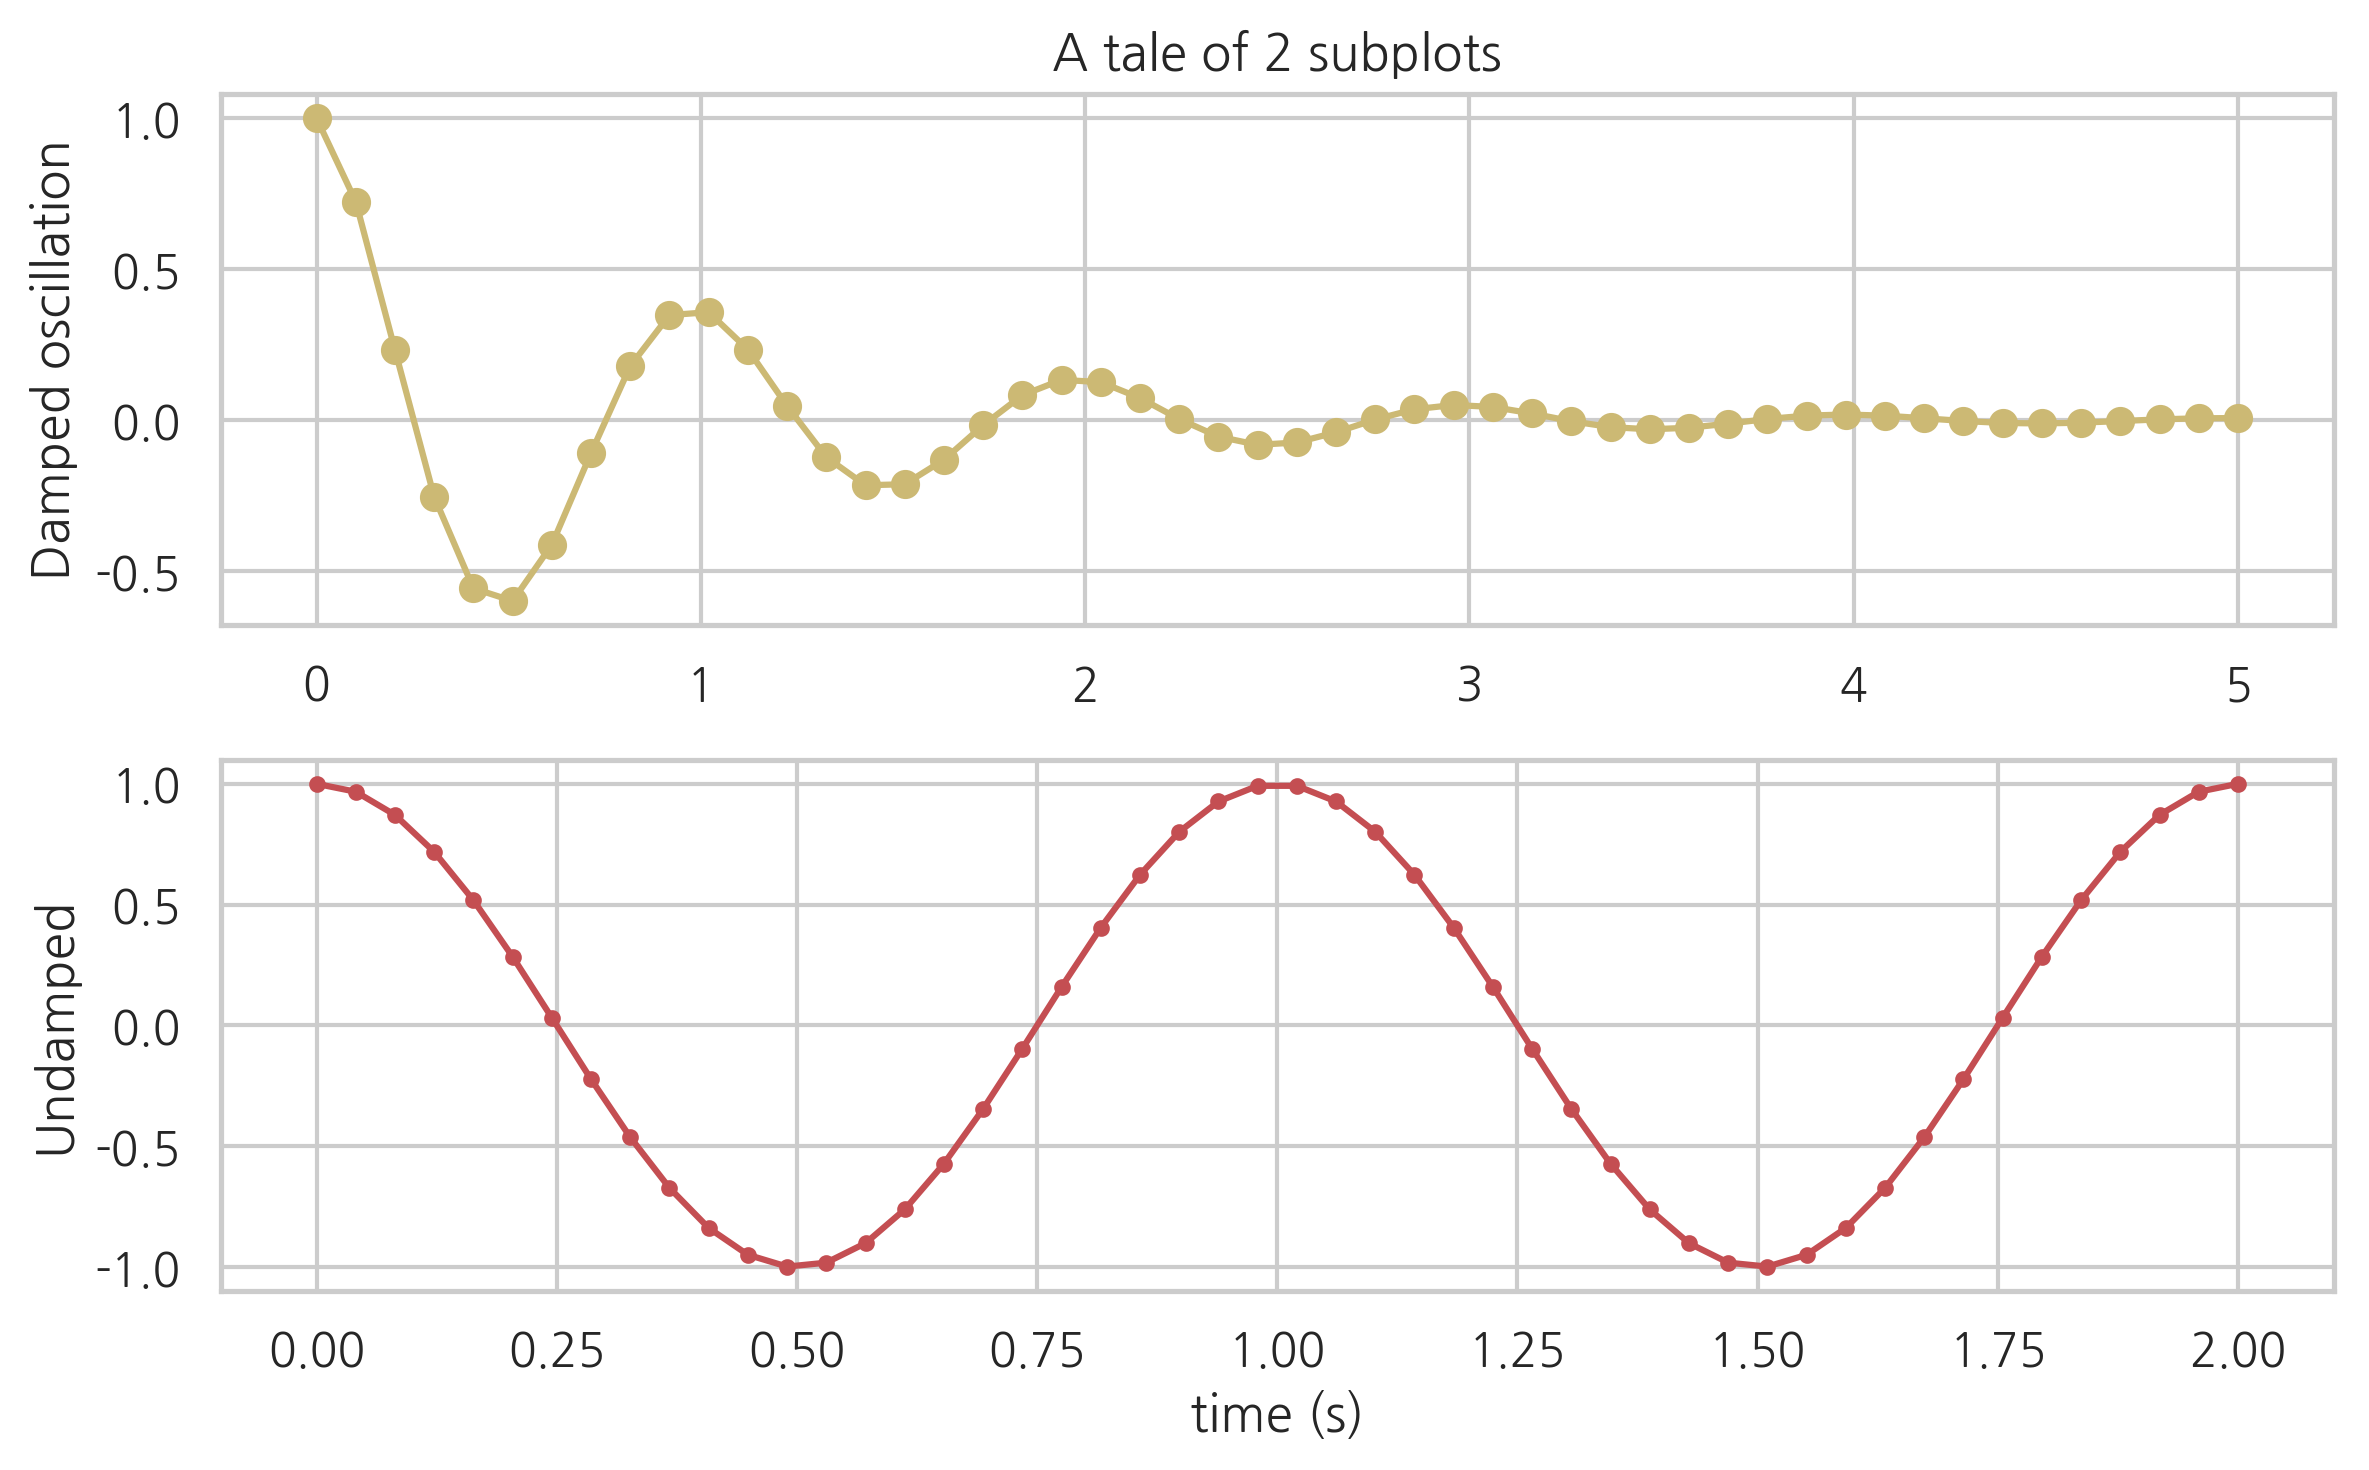

In [16]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
print(ax1)

ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
print(ax2)

plt.tight_layout()
plt.show()

만약 2x2 형태의 네 개의 플롯이라면 다음과 같이 그린다. 이 때 `subplot` 의 인수는 (2,2,1)를 줄여서 221 라는 하나의 숫자로 표시할 수도 있다.
Axes의 위치는 위에서 부터 아래로, 왼쪽에서 오른쪽으로 카운트한다.

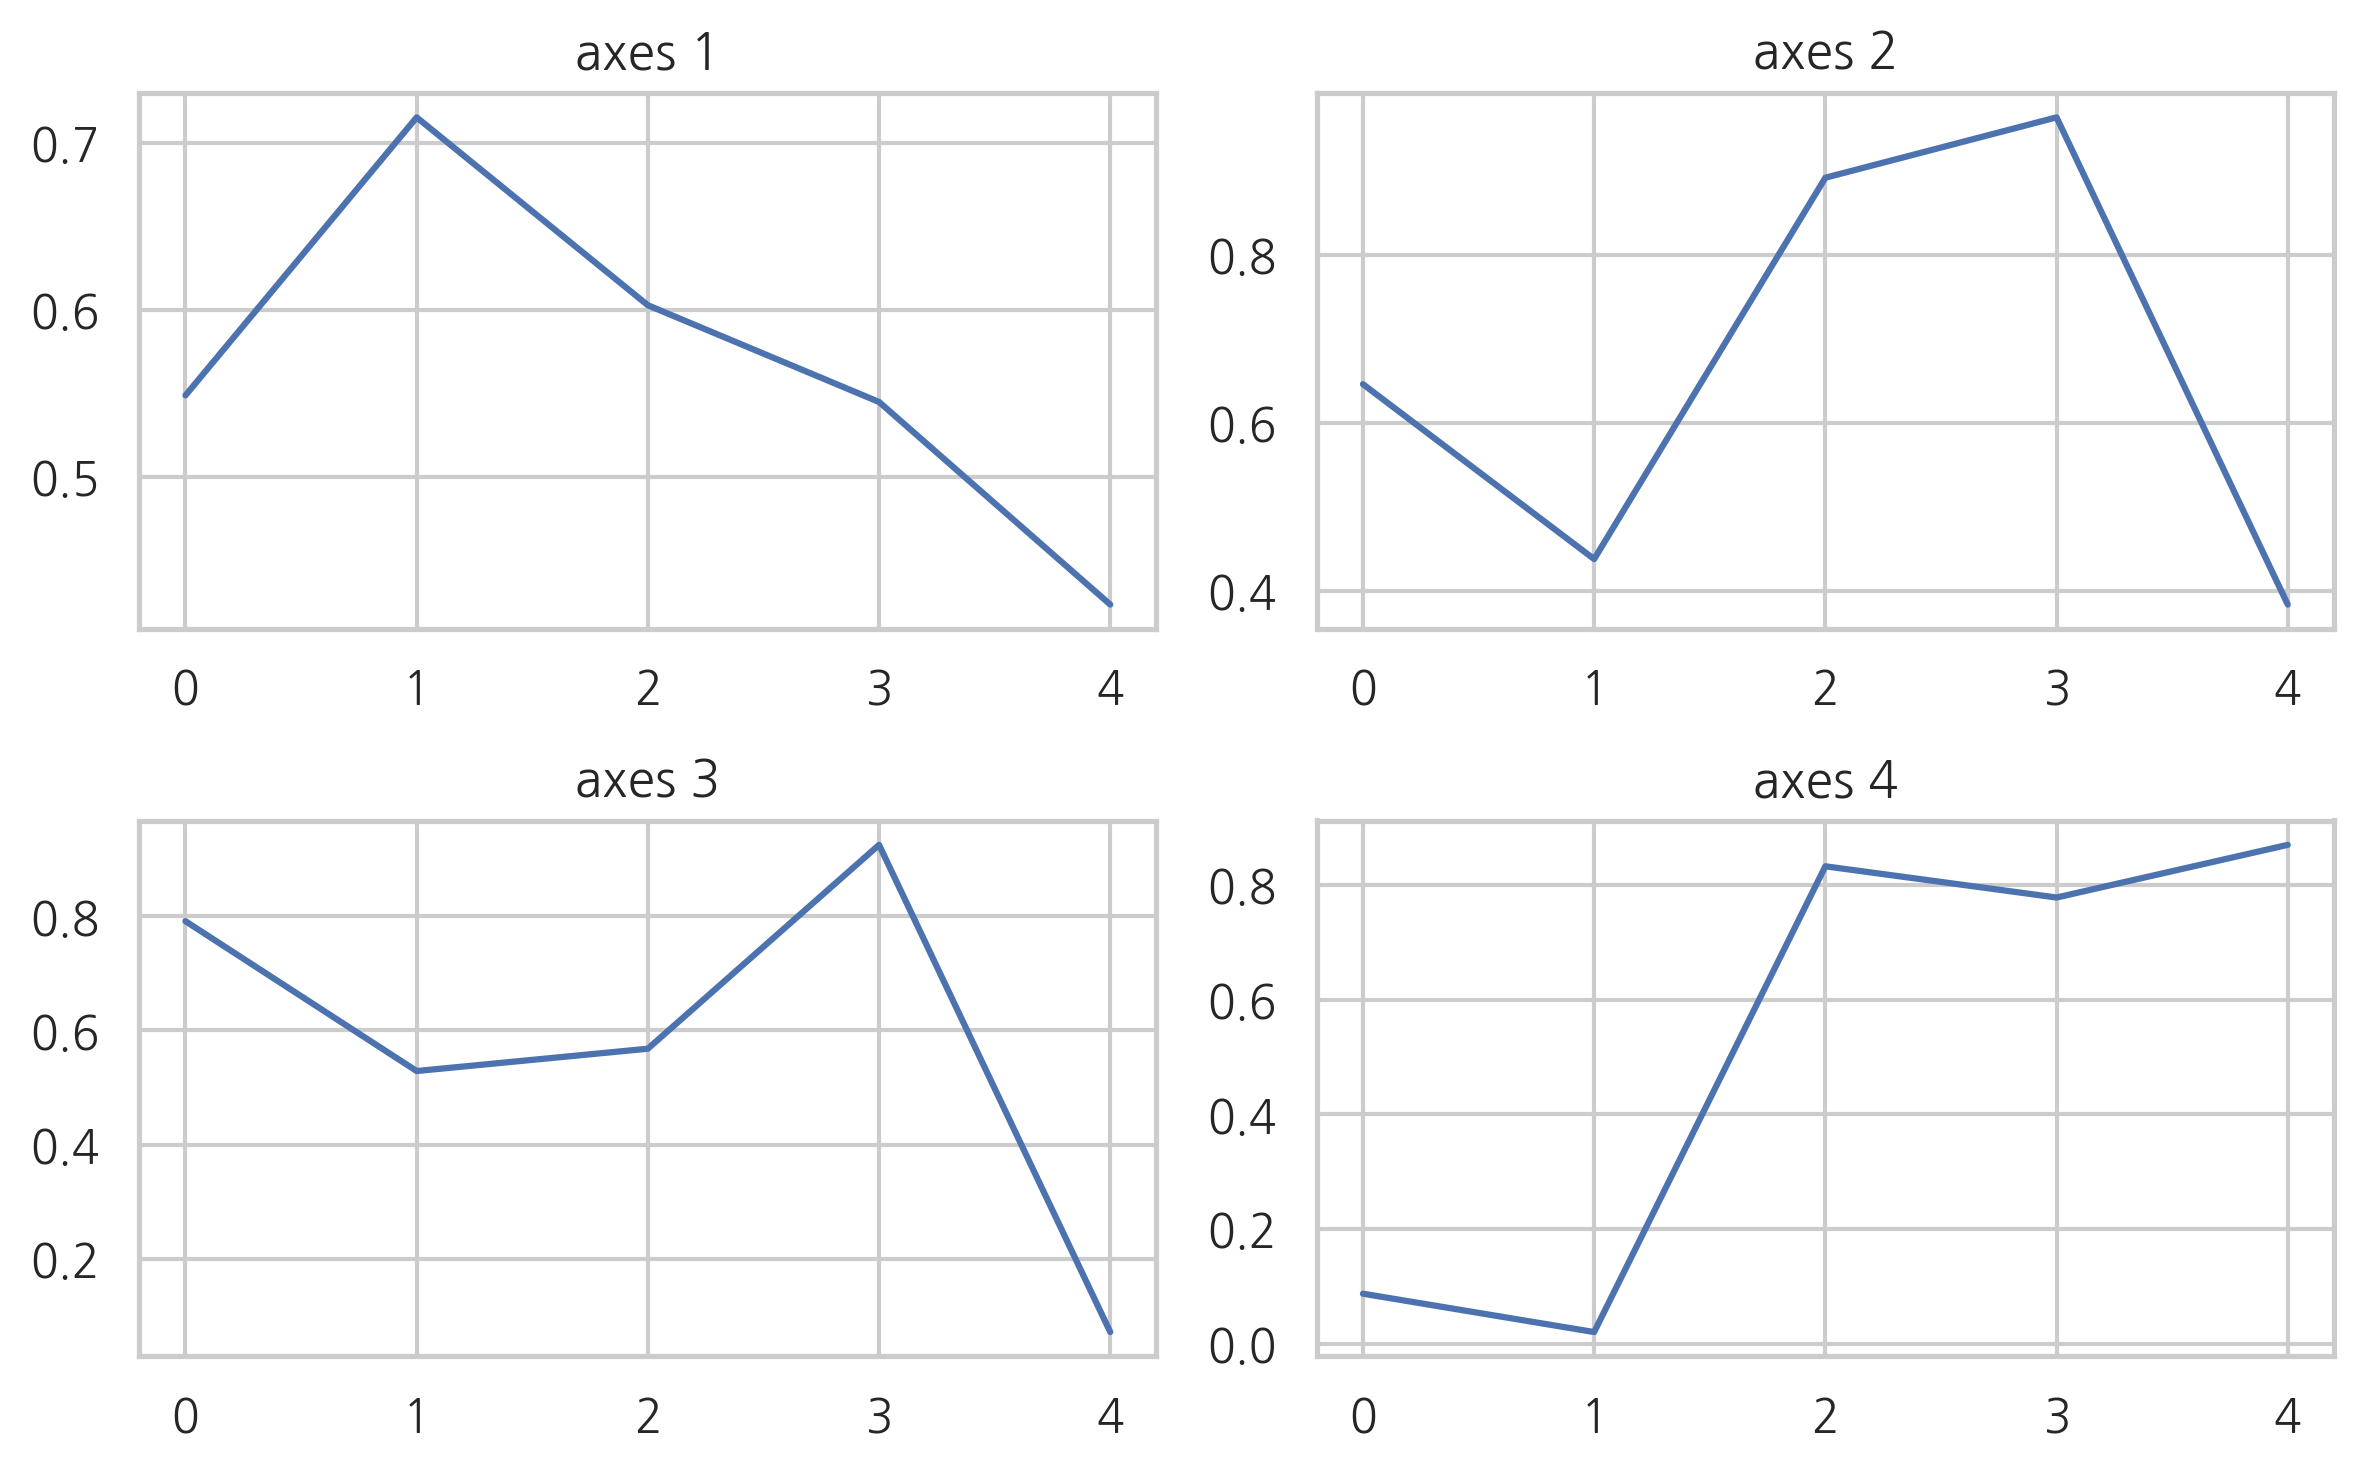

In [17]:
np.random.seed(0)

plt.subplot(221)
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()
plt.show()

`subplots` 명령으로 복수의 Axes 객체를 동시에 생성할 수도 있다. 이때는 2차원 ndarray 형태로 Axes 객체가 반환된다.

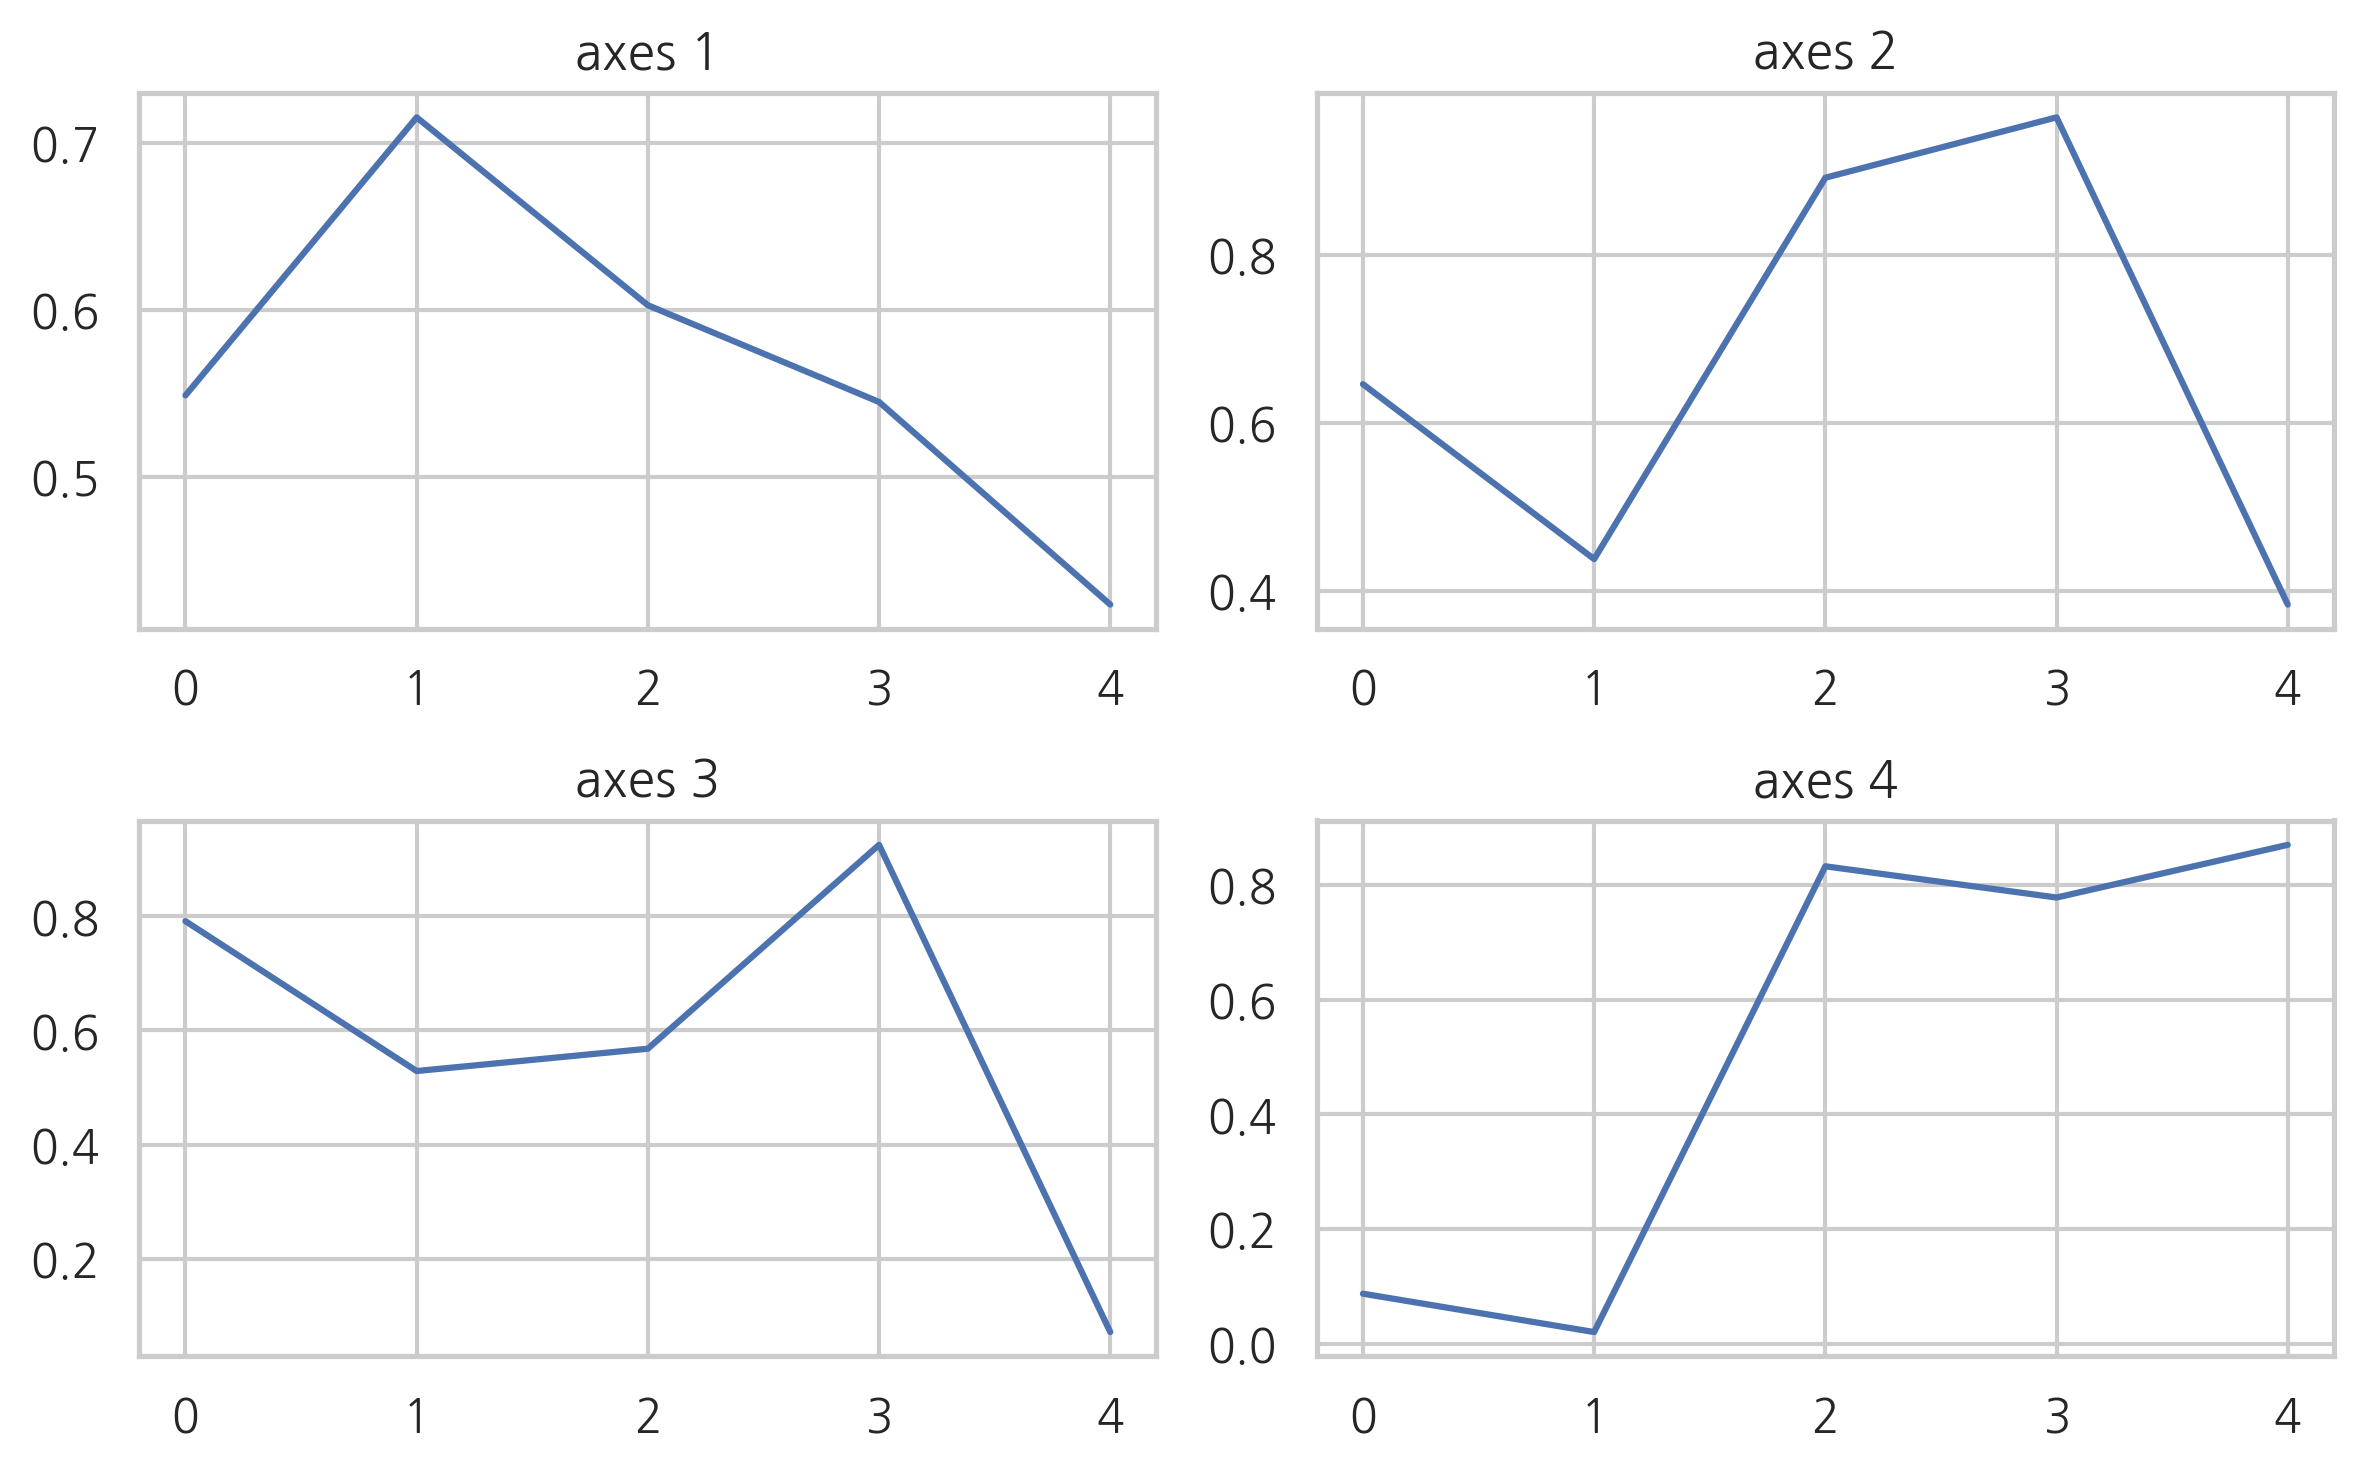

In [18]:
fig, axes = plt.subplots(2, 2)

np.random.seed(0)
axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")
axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")
axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")
axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")

plt.tight_layout()
plt.show()

#### 연습 문제 4.3.2

여러가지 함수를 사용하여 위와 같이 subplot들로 구성된 그림을 그려보자. 모든 subplot에 대해 xlabel, ylabel, title이 있어야 한다.

### **Axis 객체와 축**

하나의 Axes 객체는 두 개 이상의 Axis 객체를 가진다. Axis 객체는 플롯의 가로축이나 세로축을 나타내는 객체이다. 보다 자세한 내용은 다음 웹사이트를 참조한다.

* https://matplotlib.org/api/axis_api.html

여러가지 플롯을 하나의 Axes 객체에 표시할 때 y값의 크기가 달라서 표시하기 힘든 경우가 있다. 이 때는 다음처럼 `twinx` 명령으로 대해 복수의 y 축을 가진 플롯을 만들수도 있다. `twinx` 명령은 x 축을 공유하는 새로운 Axes 객체를 만든다.

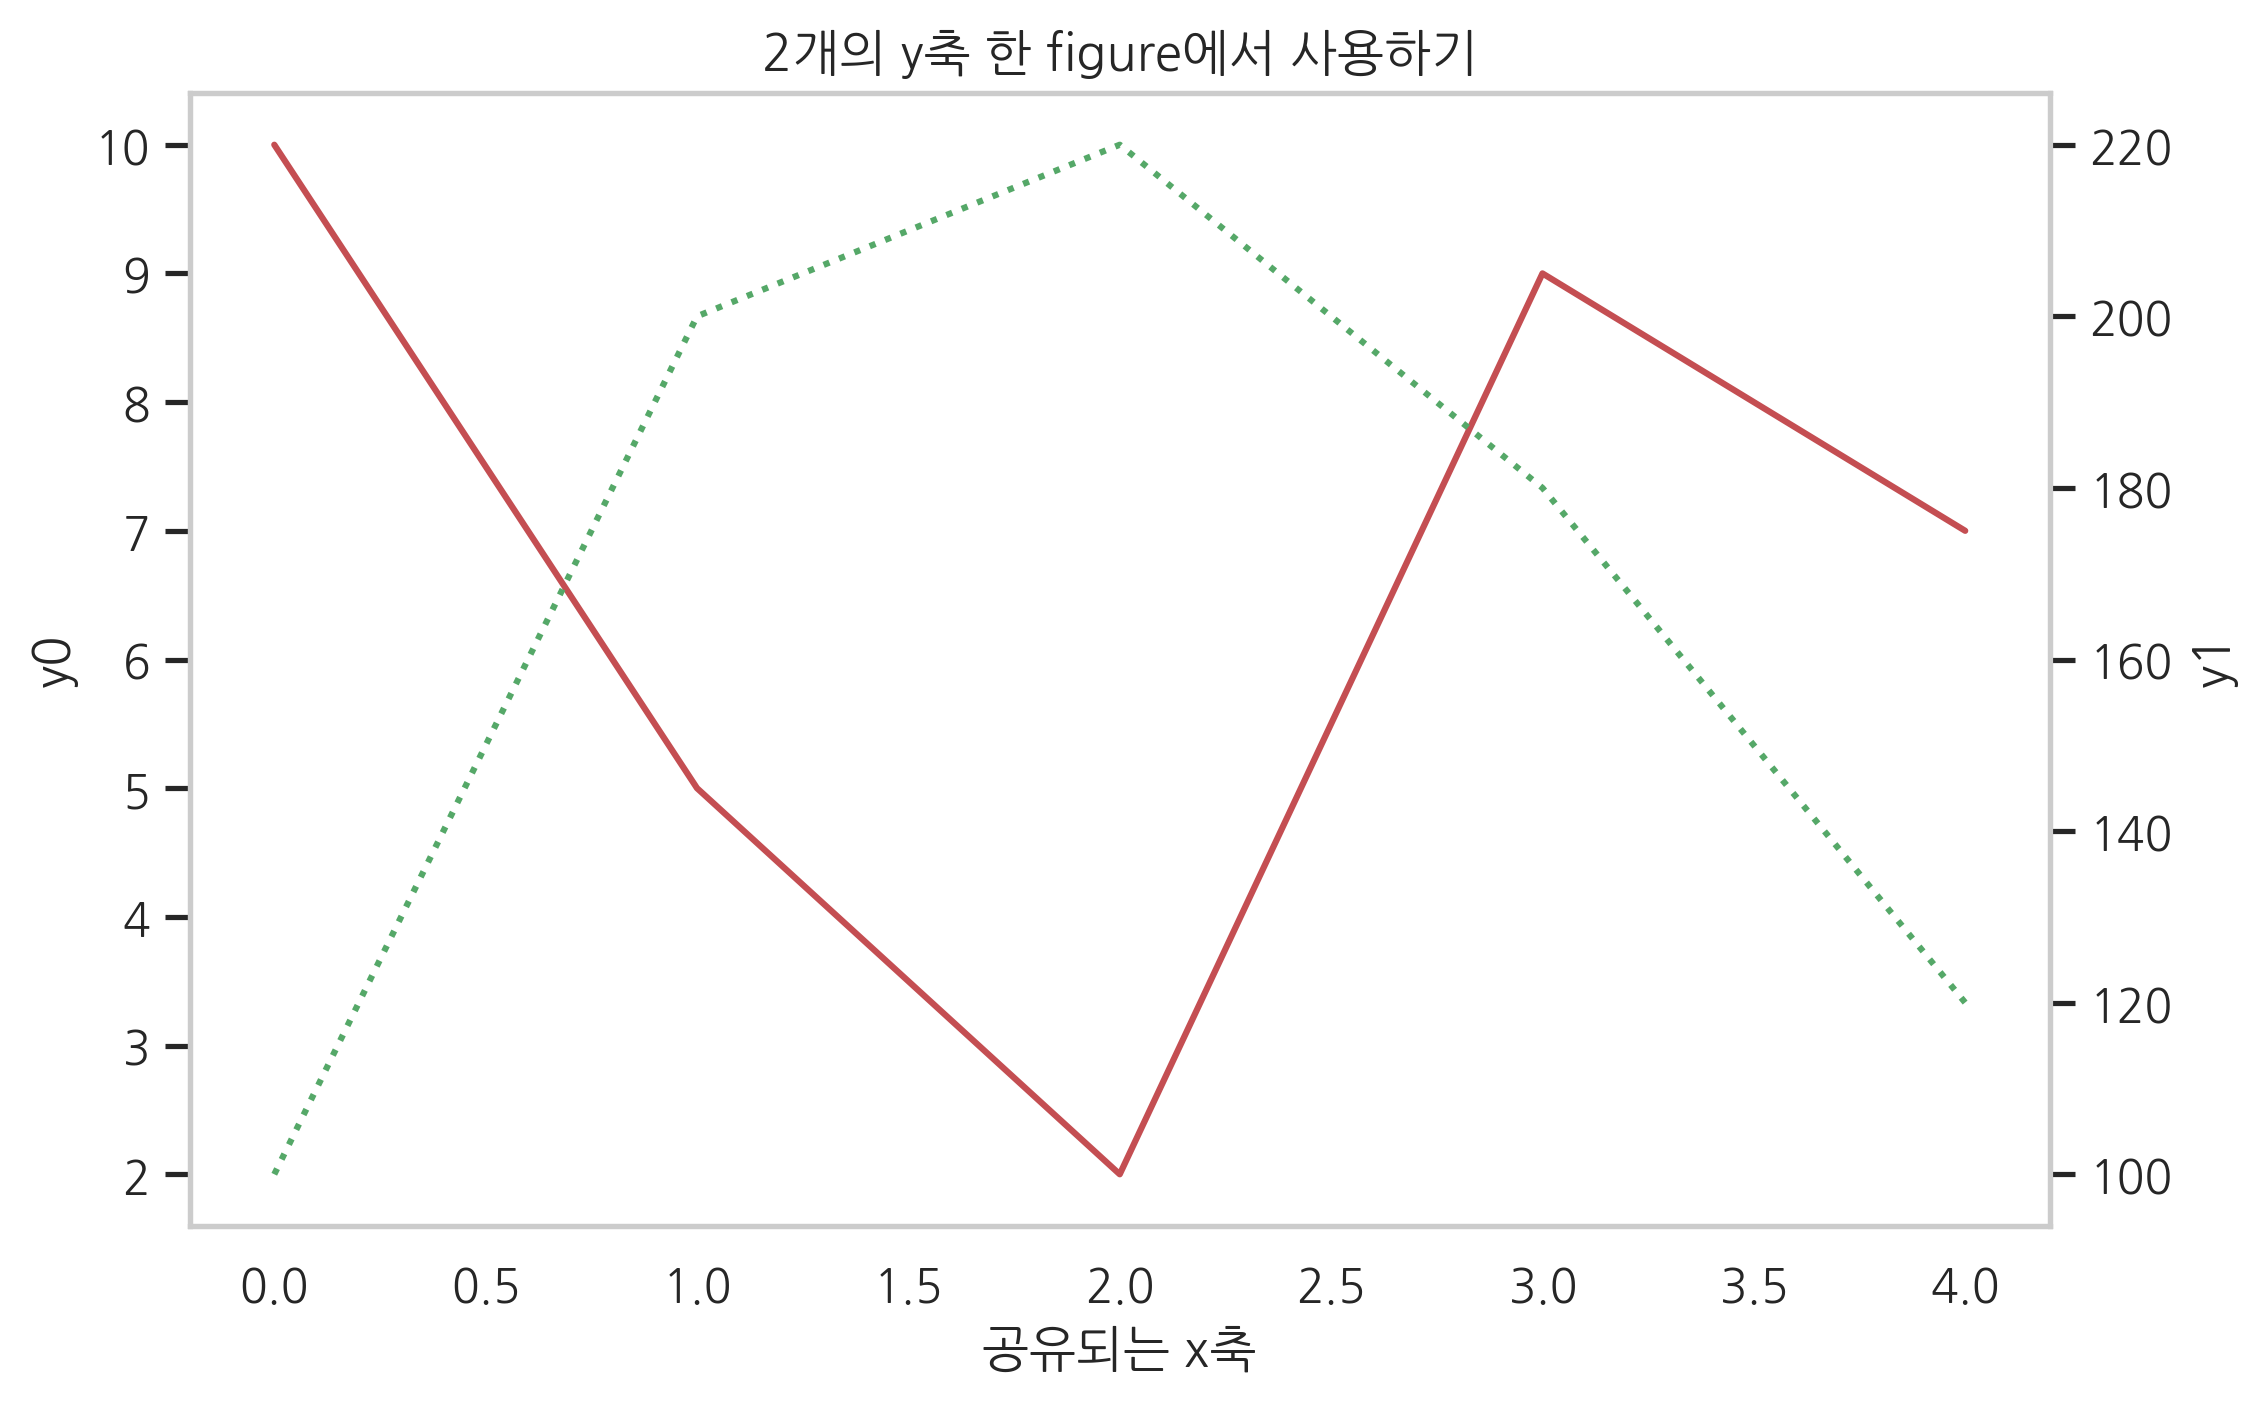

In [19]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)
ax0.set_xlabel("공유되는 x축")
plt.show()

## 한글 사용

Matplotlib에서 한글을 사용하려면 다음과 같이 한글 폰트를 적용해야 한다. 당연히 해당 폰트는 컴퓨터에 깔려 있어야 한다. 여기에서는 나눔고딕 폰트를 사용하였다. 나눔고딕 폰트 설치법은 다음과 같다.

* 윈도우/맥
    * http://hangeul.naver.com/2017/nanum 에서 폰트 인스톨러를 내려받아 실행한다.
    
* 리눅스
    * 콘솔에서 다음과 같이 실행한다.
    ```
    $ sudo apt-get install -y fonts-nanum*
    ```

폰트를 설치한 후에는 다음 명령으로 원하는 폰트가 설치되어 있는지 확인한다.

```
>>> set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))


...(생략)...
 u'Nanum Brush Script',
 u'Nanum Brush Script OTF',
 u'Nanum Pen Script',
 u'Nanum Pen Script OTF',
 u'NanumBarunGothic',
 u'NanumBarunGothicOTF',
 u'NanumBarunpen',
 u'NanumGothic',
 u'NanumGothicCoding',
 u'NanumGothicOTF',
 u'NanumMyeongjo',
 u'NanumMyeongjoOTF',
 u'NanumSquare',
...(생략)...
 
 
```


설치된 폰트를 사용하는 방법은 크게 두가지 이다.

* rc parameter 설정으로 이후의 그림 전체에 적용
* 인수를 사용하여 개별 텍스트 관련 명령에만 적용

한글 문자열은 항상 유니코드를 사용해야 한다.

우선 rc parameter를 설정하여 이후의 그림 전체에 적용해 보자

In [20]:
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

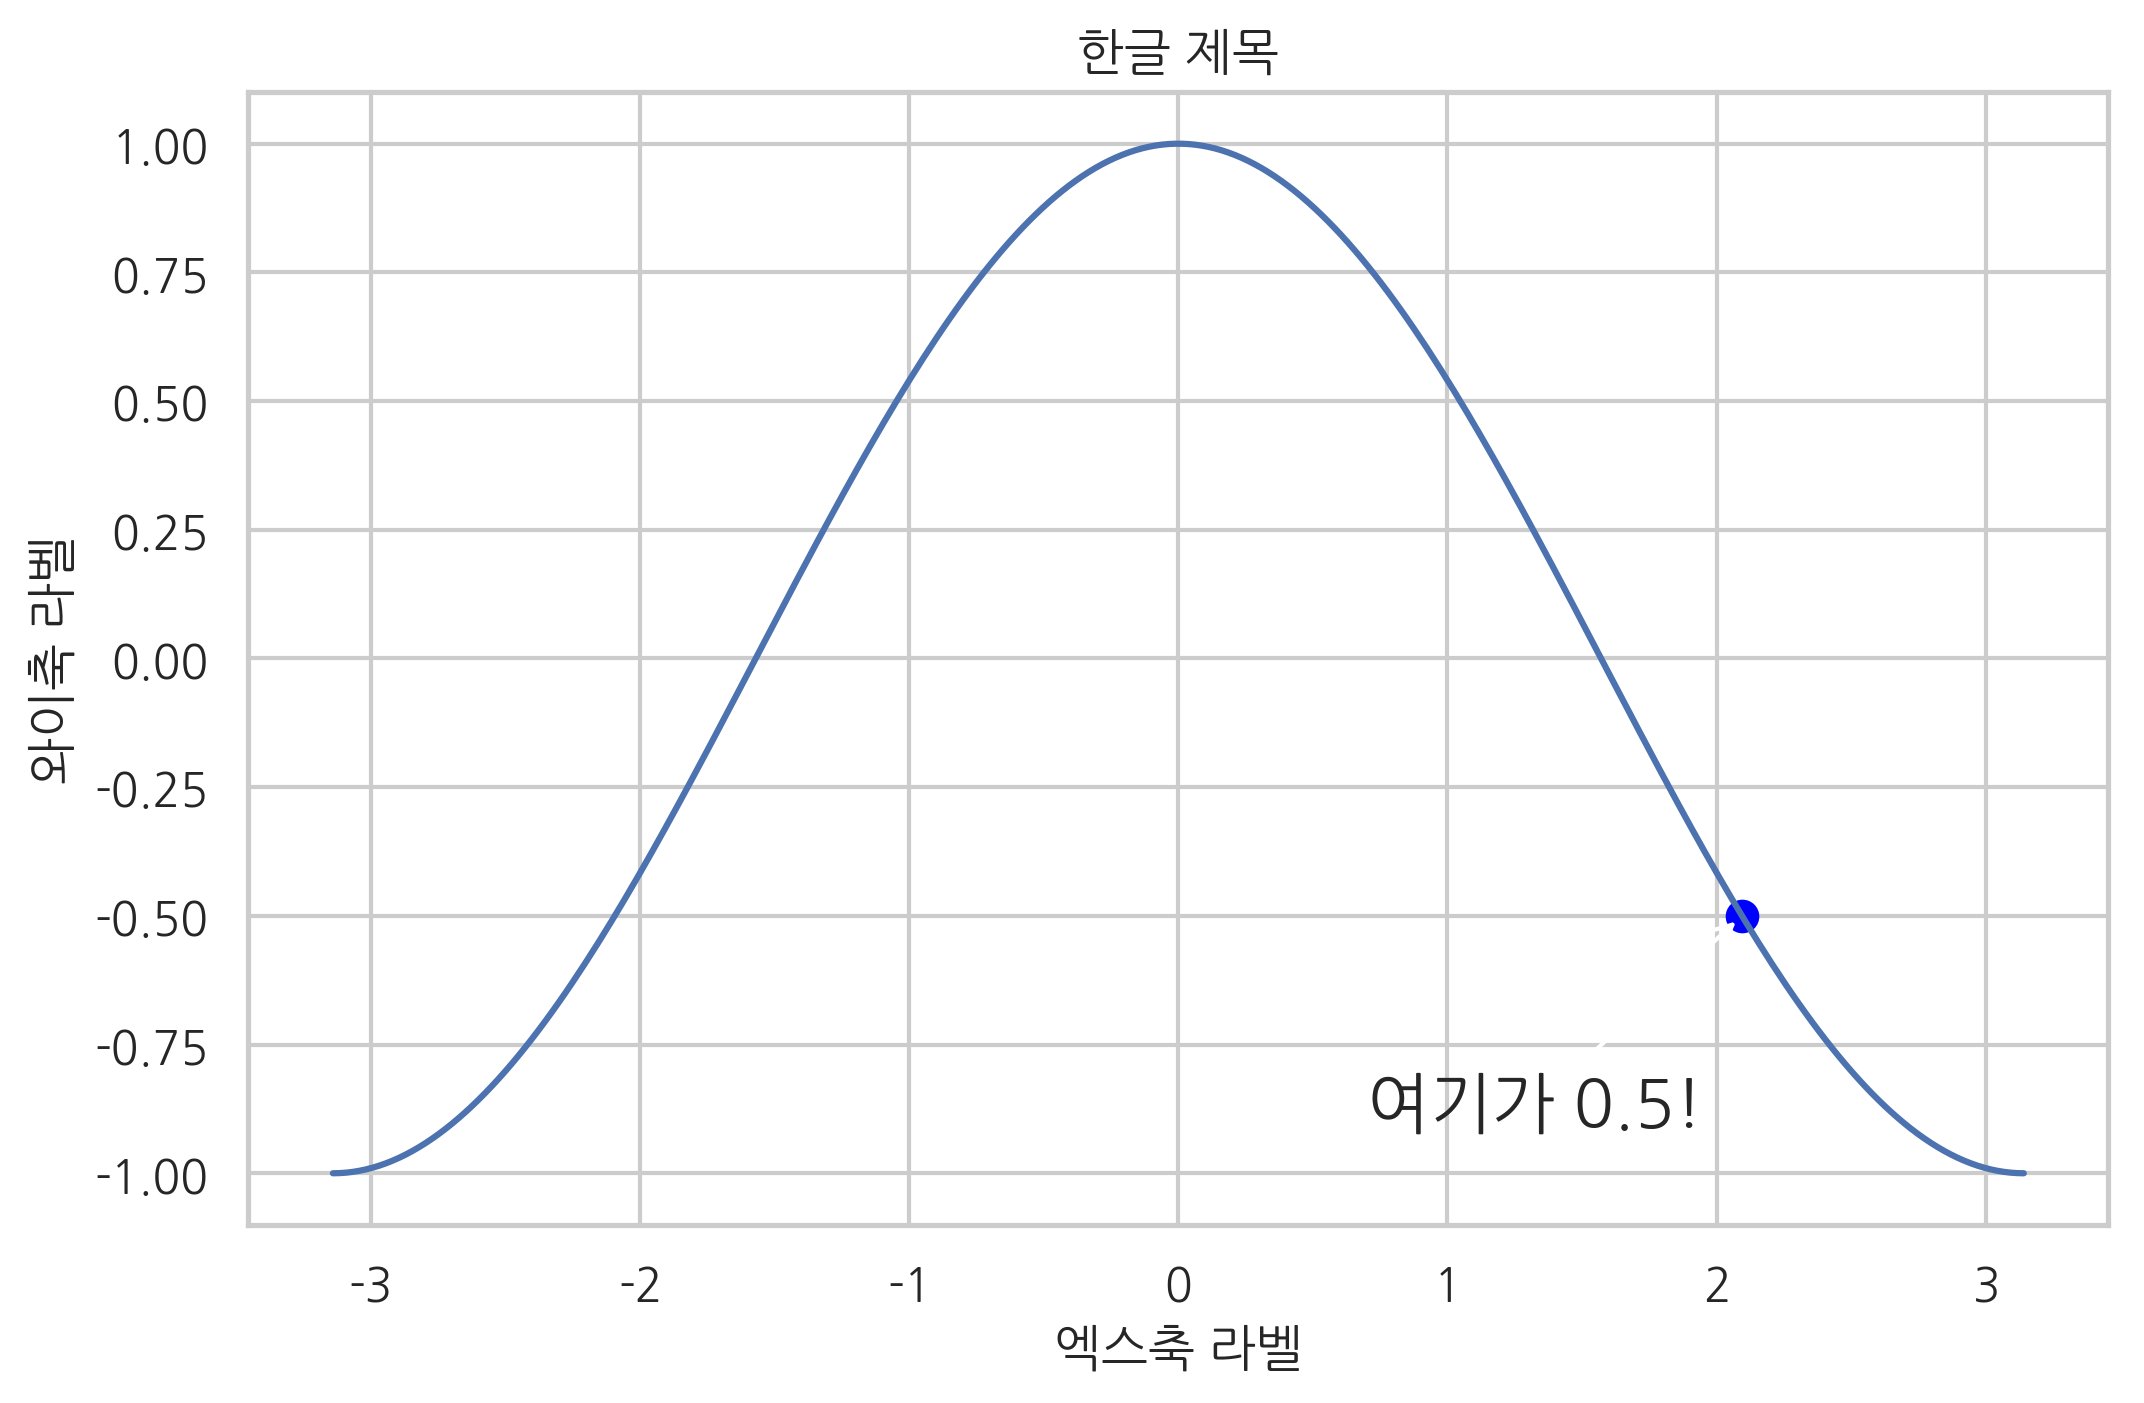

In [21]:
plt.title('한글 제목')
plt.plot(X, C, label="코사인")
t = 2 * np.pi / 3
plt.scatter(t, np.cos(t), 50, color='blue')
plt.xlabel("엑스축 라벨")
plt.ylabel("와이축 라벨")
plt.annotate("여기가 0.5!",
             xy=(t, np.cos(t)), xycoords='data', xytext=(-90, -50),
             textcoords='offset points',
             fontsize=16, arrowprops=dict(arrowstyle="->"))
plt.show()

만약 개별적으로 폰트를 적용하고 싶을 때는 다음과 같이 폰트 패밀리, 색상, 크기를 정하여 플롯 명령의 `fontdict` 인수에 넣는다.

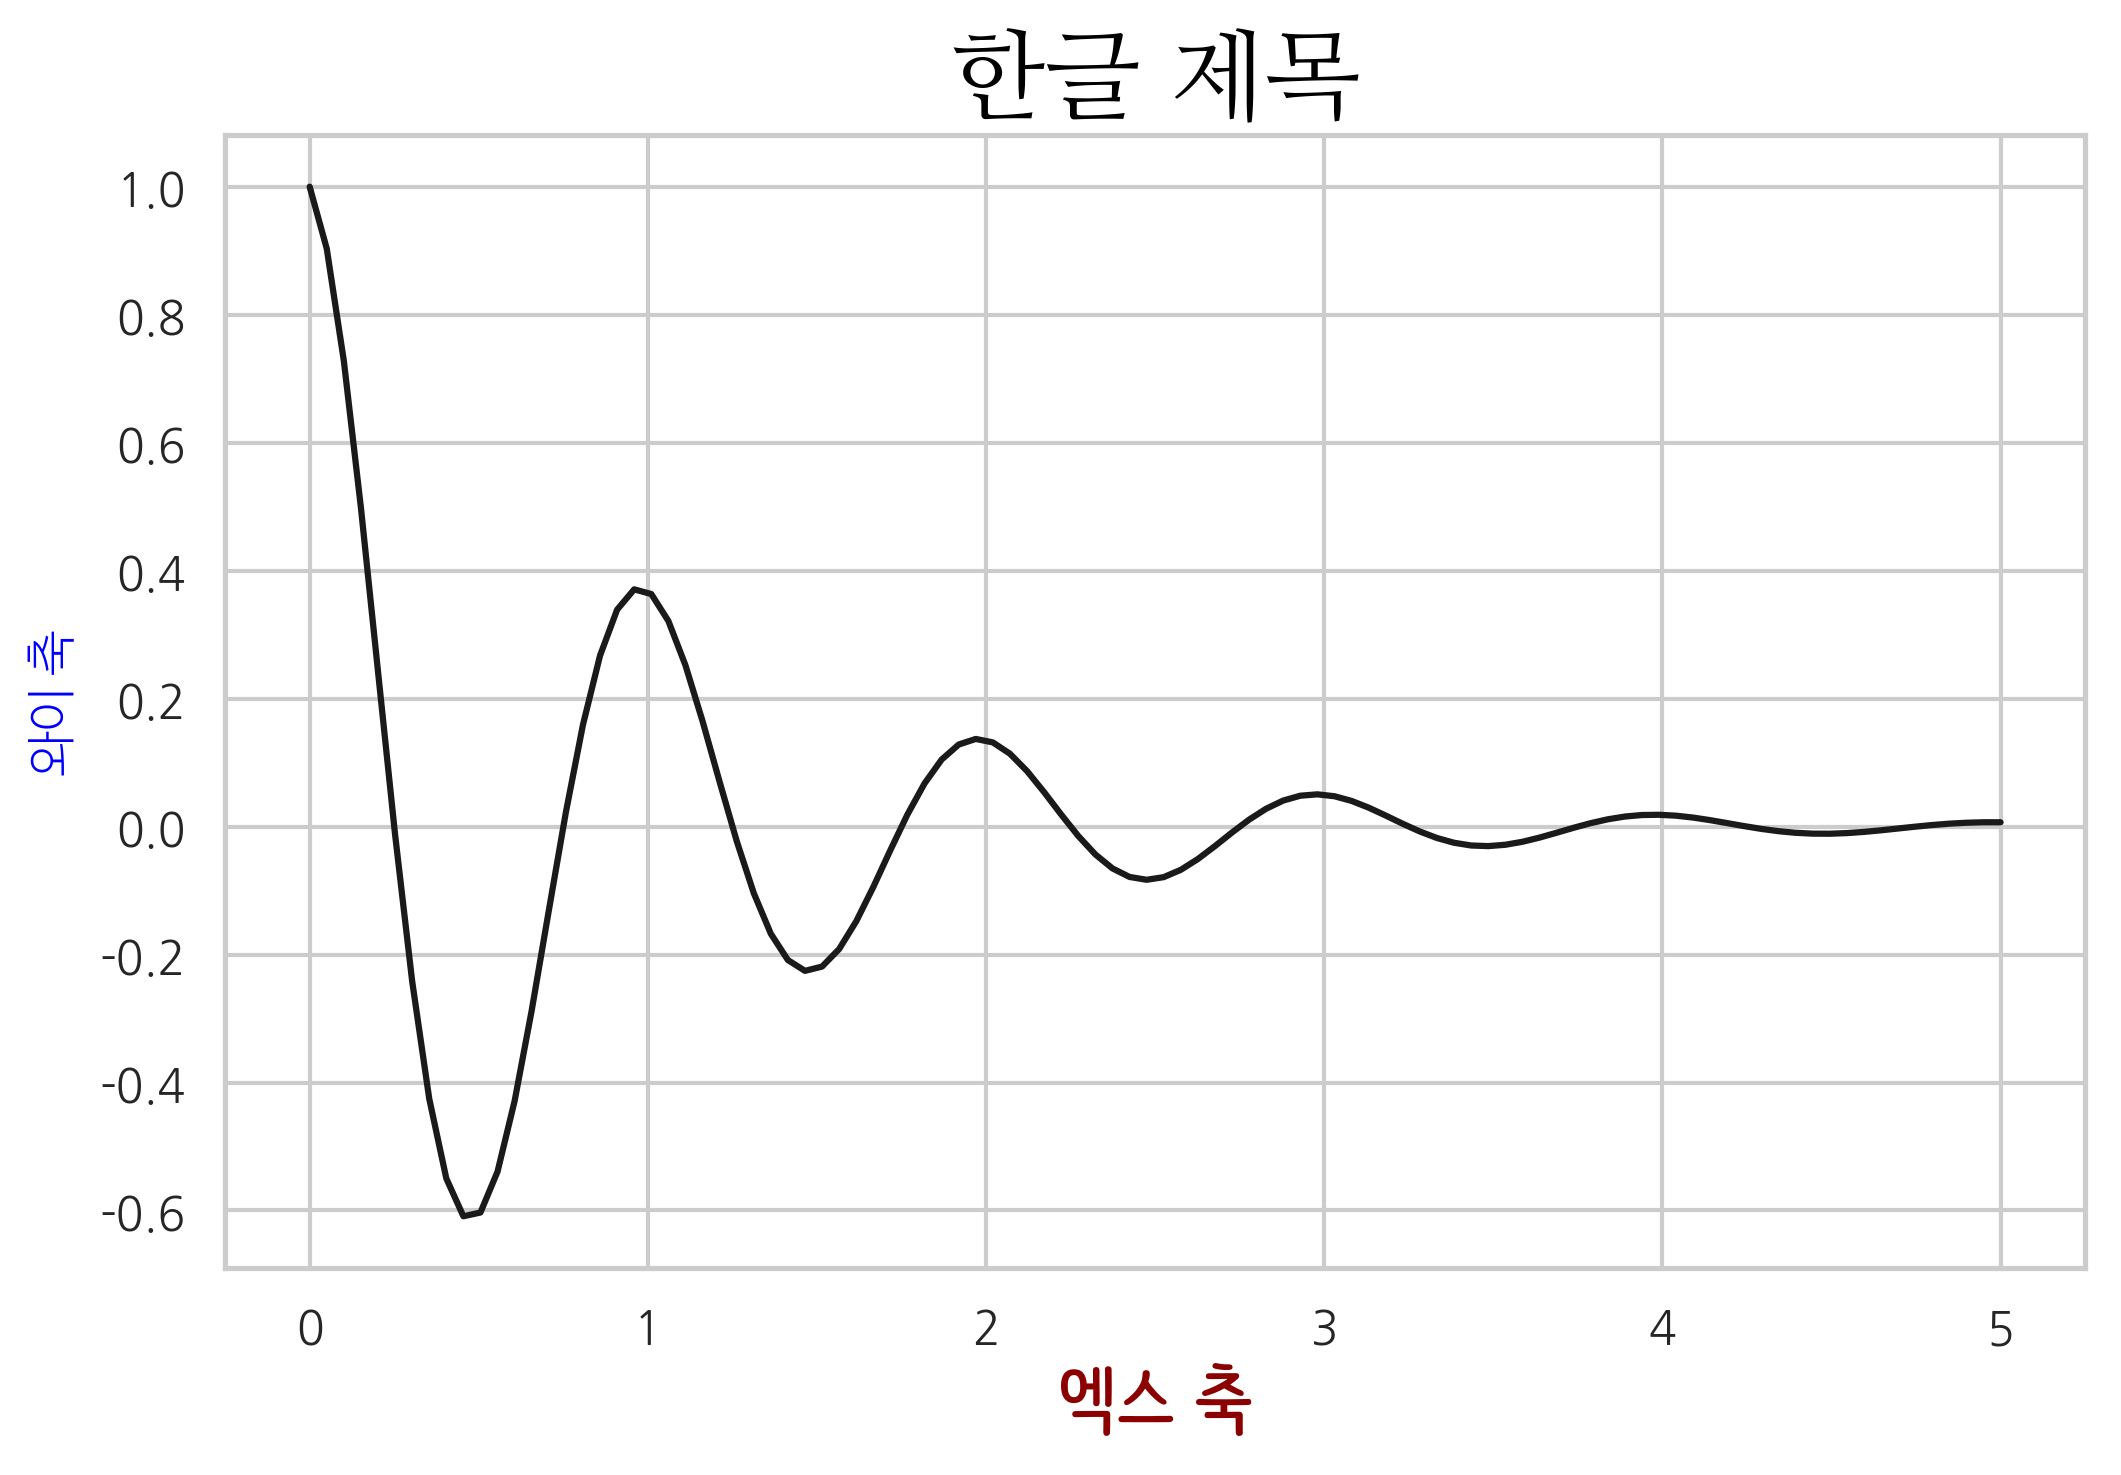

In [22]:
font1 = {'family': 'NanumMyeongjo', 'color':  'black', 'size': 24}
font2 = {'family': 'NanumBarunpen',
         'color':  'darkred', 'weight': 'bold', 'size': 18}
font3 = {'family': 'NanumBarunGothic',
         'color':  'blue', 'weight': 'light', 'size': 12}

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

plt.plot(x, y, 'k')
plt.title('한글 제목', fontdict=font1)
plt.xlabel('엑스 축', fontdict=font2)
plt.ylabel('와이 축', fontdict=font3)
plt.subplots_adjust()
plt.show()

#### 연습 문제 4.3.3

1. Matplotlib 갤러리 웹사이트에서 관심있는 예제 코드를 하나 고른다. 
  * http://matplotlib.org/gallery.html
2. 예제 코드에 사용된 Matplotlib API 명령의 목록을 만들고 Matplotlib 웹사이트에서 관련 링크를 찾아 내용을 정리한다.
3. 변형된 형태의 플롯을 만들어본다.